In [1]:
# Import necessary packages.

import pandas as pd
import numpy as np

from scipy import stats
from pandas.api.types import is_numeric_dtype

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns 

In [2]:
# Load file loan - engine='python' required to take care of the encoding error.

loan_dataframe = pd.read_csv('loan.csv', engine='python')

### Data Understanding

In [3]:
# loan Dataframe Sample.

pd.options.display.max_columns = loan_dataframe.shape[1]
loan_dataframe.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
17624,712528,905643,2000,2000,2000.00,36 months,7.66%,62.36,A,A5,"Motricity, Inc.",2 years,RENT,44000.0,Source Verified,Mar-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Consolidation Loan,980xx,WA,17.18,0,Nov-98,0,64.0,NaN,4,0,0,0%,18,f,0.00,0.00,2012.800000,2012.80,2000.00,12.80,0.000000,0.00,0.0000,May-11,2013.35,NaN,May-11,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
17043,718267,912462,15000,15000,14950.00,60 months,10.37%,321.45,B,B3,NaN,< 1 year,MORTGAGE,85000.0,Verified,Apr-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 04/07/11 > I am looking fo...,small_business,Sustainable Technology,287xx,NC,8.68,0,Oct-01,0,NaN,NaN,7,0,4850,32.30%,31,f,0.00,0.00,19286.480760,19222.19,15000.00,4286.48,0.000000,0.00,0.0000,Apr-16,320.93,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8413,852107,1064127,7000,7000,6975.00,36 months,10.59%,227.82,B,B2,Subaru of Santa Monica,2 years,RENT,52000.0,Not Verified,Sep-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Chase Payoff loan 1,900xx,CA,7.71,0,Feb-97,1,45.0,NaN,5,0,6680,33.90%,13,f,0.00,0.00,7238.313706,7212.46,7000.00,238.31,0.000000,0.00,0.0000,Jan-12,6557.88,NaN,Jan-12,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
33871,460877,575634,6125,6125,6075.00,36 months,8.59%,193.62,A,A4,ADVANCE/NEWHOUSE COMMUNICATIONS,3 years,OWN,61360.0,Not Verified,Nov-09,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,575634 added on 11/17/09 > Faced with escala...,debt_consolidation,Goodbye Debt,323xx,FL,10.21,0,Oct-00,0,NaN,NaN,16,0,6775,22%,28,f,0.00,0.00,6970.102971,6913.20,6125.00,845.10,0.000000,0.00,0.0000,Dec-12,196.38,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Loan Dataframe Shape.

loan_dataframe.shape

(39717, 111)

In [5]:
# Loan Dataframe Describe.

loan_dataframe.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
# Loan Dataframe Info.

loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# Target Variable

loan_dataframe.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Data Cleaning

In [8]:
# Dataset contains more than 50% columns with all null or nan entries. Drop them.

loan_dataframe.dropna(how='all', axis=1, inplace=True)
loan_dataframe.shape

(39717, 57)

In [9]:
# List comprehension to get non unique columns; that is columns with single entry.

nonuniquecolumns = [col for col in loan_dataframe if len(loan_dataframe[col].unique()) == 1]

# List comprehension to check the values in the non unique columns identified.

[print(col, ' : ', loan_dataframe[col].unique()) for col in nonuniquecolumns]

pymnt_plan  :  ['n']
initial_list_status  :  ['f']
policy_code  :  [1]
application_type  :  ['INDIVIDUAL']
acc_now_delinq  :  [0]
delinq_amnt  :  [0]


[None, None, None, None, None, None]

In [10]:
# Drop the columns with non unique (single) value.

loan_dataframe.drop(nonuniquecolumns, axis=1, inplace=True)
loan_dataframe.shape

(39717, 51)

In [11]:
# Loan Dataframe Info.

loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Remove customer behavioral and other irrelevent columns.

##### id                                     Not relevent for analysis; ids not much meaningful for the study.
##### member_id                     Not relevent for analysis; ids not much meaningful for the study.
##### funded_amnt                   Not relevent for analysis; funded_amnt_inv is more important.
##### emp_title                     Not relevent for analysis; company names.
##### issue_d                       Not relevent for analysis; Not performing time series analysis.
##### url                           Not relevent for analysis; Not performing text analysis.
##### desc                          Not relevent for analysis; Not performing text analysis.
##### title                         Not relevent for analysis; purpose is more important.
##### zip_code                      Not relevent for analysis; contains masked data.
##### addr_state                    Not relevent for analysis; state can be ignored for risk/financial analysis.
##### delinq_2yrs                   Customer Behavioral variable.
##### earliest_cr_line              Not relevent for analysis; Not performing time series analysis.
##### revol_bal                     Customer Behavioral variable.
##### out_prncp                     Customer Behavioral variable.
##### out_prncp_inv                 Customer Behavioral variable.
##### total_pymnt                   Customer Behavioral variable.
##### total_pymnt_inv               Customer Behavioral variable; related to investors.
##### total_rec_prncp               Customer Behavioral variable.
##### total_rec_int                 Customer Behavioral variable.
##### total_rec_late_fee            Customer Behavioral variable.
##### recoveries                    Customer Behavioral variable.
##### collection_recovery_fee       Customer Behavioral variable.
##### last_pymnt_d                  Customer Behavioral variable.
##### last_pymnt_amnt               Customer Behavioral variable.
##### next_pymnt_d                  Customer Behavioral variable.
##### last_credit_pull_d            Customer Behavioral variable.

In [12]:
# remove  
loan_dataframe.drop(['id','member_id', 'funded_amnt', 'emp_title', 'issue_d', 'url',  'desc', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d'], axis=1, inplace=True)
loan_dataframe.sample(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
1899,25000,25000.00000,60 months,15.27%,598.30,C,C4,10+ years,MORTGAGE,150000.0,Source Verified,Current,debt_consolidation,9.88,1,NaN,NaN,6,0,87.80%,24,0.0,0.0,0.0,0.0
808,13250,13250.00000,60 months,17.27%,331.23,D,D3,< 1 year,RENT,26000.0,Not Verified,Current,debt_consolidation,10.89,3,NaN,NaN,8,0,59.70%,18,0.0,0.0,0.0,0.0
11177,7200,7175.00000,36 months,18.79%,263.16,E,E3,3 years,RENT,40000.0,Not Verified,Fully Paid,debt_consolidation,24.27,0,18.0,NaN,7,0,98.30%,17,0.0,0.0,0.0,0.0
2372,10000,10000.00000,36 months,10.65%,325.74,B,B2,10+ years,RENT,44000.0,Source Verified,Fully Paid,other,18.22,0,NaN,NaN,9,0,93.80%,22,0.0,0.0,0.0,0.0
18965,15000,14992.88052,60 months,14.17%,350.35,C,C5,1 year,MORTGAGE,78000.0,Verified,Fully Paid,debt_consolidation,12.57,1,NaN,NaN,14,0,66.80%,32,0.0,0.0,0.0,0.0
21533,5875,5875.00000,36 months,6.17%,179.19,A,A3,< 1 year,MORTGAGE,77237.0,Not Verified,Fully Paid,debt_consolidation,1.85,1,NaN,NaN,5,0,5.50%,19,0.0,0.0,0.0,0.0
22138,7000,7000.00000,60 months,14.83%,165.91,D,D3,4 years,RENT,45600.0,Not Verified,Fully Paid,credit_card,12.00,0,NaN,NaN,9,0,69%,11,0.0,0.0,0.0,0.0
9751,25000,21263.77460,60 months,15.23%,597.78,C,C5,1 year,RENT,75000.0,Verified,Fully Paid,debt_consolidation,12.66,3,59.0,NaN,11,0,7.50%,34,0.0,0.0,0.0,0.0
22031,15000,15000.00000,36 months,14.83%,518.74,D,D3,10+ years,RENT,88000.0,Source Verified,Fully Paid,debt_consolidation,17.32,2,14.0,NaN,3,0,4.85%,22,0.0,0.0,0.0,0.0
39618,10000,200.00000,36 months,11.22%,328.43,C,C4,8 years,MORTGAGE,30000.0,Not Verified,Fully Paid,other,20.40,3,0.0,0.0,5,0,0%,9,0.0,0.0,NaN,0.0


In [13]:
loan_dataframe.shape

(39717, 25)

In [14]:
# Missing values in master_frame dataframe in percentage.
round(100*(loan_dataframe.isnull().sum()/len(loan_dataframe.index)), 2)

loan_amnt                      0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
loan_status                    0.00
purpose                        0.00
dti                            0.00
inq_last_6mths                 0.00
mths_since_last_delinq        64.66
mths_since_last_record        92.99
open_acc                       0.00
pub_rec                        0.00
revol_util                     0.13
total_acc                      0.00
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [15]:
# Drop columns with more than 60% missing values.

loan_dataframe.drop(['mths_since_last_delinq','mths_since_last_record'], axis=1, inplace=True)
loan_dataframe.sample(10)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
13210,35000,21375.00000,60 months,17.99%,543.94,E,E1,10+ years,MORTGAGE,180000.0,Verified,Fully Paid,small_business,15.43,1,9,0,0%,42,0.0,0.0,0.0,0.0
10842,16000,14752.48706,60 months,11.99%,355.84,B,B5,5 years,RENT,56000.0,Verified,Fully Paid,debt_consolidation,17.27,0,7,0,72.80%,25,0.0,0.0,0.0,0.0
15450,18000,17975.00000,60 months,20.62%,483.13,F,F2,8 years,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,10.24,1,11,0,90.80%,52,0.0,0.0,0.0,0.0
5466,7500,7500.00000,36 months,7.51%,233.34,A,A3,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,credit_card,4.17,0,11,1,24.80%,20,0.0,0.0,1.0,0.0
17582,10950,10323.47730,36 months,7.29%,339.56,A,A4,7 years,OWN,34000.0,Not Verified,Fully Paid,debt_consolidation,28.84,1,7,0,16.20%,29,0.0,0.0,0.0,0.0
4623,9600,9600.00000,36 months,16.77%,341.17,D,D2,5 years,RENT,45000.0,Source Verified,Charged Off,debt_consolidation,5.68,2,5,0,87%,8,0.0,0.0,0.0,0.0
7311,3000,3000.00000,36 months,15.96%,105.42,C,C5,10+ years,MORTGAGE,58000.0,Not Verified,Charged Off,other,3.97,1,9,0,73.60%,19,0.0,0.0,0.0,0.0
23165,20000,18019.97981,60 months,6.91%,395.18,A,A5,7 years,MORTGAGE,90792.0,Verified,Fully Paid,debt_consolidation,9.00,0,12,0,26.90%,39,0.0,0.0,0.0,0.0
29664,25000,23461.71329,36 months,10.99%,818.35,B,B4,3 years,MORTGAGE,107000.0,Source Verified,Fully Paid,credit_card,17.43,1,13,0,67.10%,49,0.0,0.0,0.0,0.0
7596,3000,3000.00000,36 months,12.42%,100.25,B,B4,4 years,MORTGAGE,66000.0,Not Verified,Fully Paid,other,19.78,1,10,0,86.40%,22,0.0,0.0,0.0,0.0


In [16]:
loan_dataframe.shape

(39717, 23)

In [17]:
loan_dataframe.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [18]:
loan_dataframe.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [19]:
loan_dataframe.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [20]:
loan_dataframe.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [21]:
loan_dataframe.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths','pub_rec', 'pub_rec_bankruptcies','tax_liens'], axis=1, inplace=True )
loan_dataframe.shape

(39717, 18)

In [22]:
loan_dataframe.dropna(subset=['emp_length', 'revol_util'], inplace=True )
loan_dataframe.shape

(38595, 18)

In [23]:
round(100*(loan_dataframe.isnull().sum()/len(loan_dataframe.index)), 2)

loan_amnt              0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
loan_status            0.0
purpose                0.0
dti                    0.0
inq_last_6mths         0.0
open_acc               0.0
revol_util             0.0
total_acc              0.0
dtype: float64

In [24]:
loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38595 non-null  int64  
 1   funded_amnt_inv      38595 non-null  float64
 2   term                 38595 non-null  object 
 3   int_rate             38595 non-null  object 
 4   installment          38595 non-null  float64
 5   grade                38595 non-null  object 
 6   sub_grade            38595 non-null  object 
 7   emp_length           38595 non-null  object 
 8   home_ownership       38595 non-null  object 
 9   annual_inc           38595 non-null  float64
 10  verification_status  38595 non-null  object 
 11  loan_status          38595 non-null  object 
 12  purpose              38595 non-null  object 
 13  dti                  38595 non-null  float64
 14  inq_last_6mths       38595 non-null  int64  
 15  open_acc             38595 non-null 

In [25]:
loan_dataframe['term'] = pd.to_numeric(loan_dataframe['term'].apply(lambda x: x.split()[0]))
loan_dataframe.term.value_counts()

36    28243
60    10352
Name: term, dtype: int64

In [26]:
loan_dataframe['int_rate'] = pd.to_numeric(loan_dataframe['int_rate'].apply(lambda x: x.split('%')[0]))
loan_dataframe.int_rate.value_counts()

10.99    932
13.49    813
11.49    800
7.51     756
7.88     701
        ... 
18.72      1
21.48      1
22.64      1
16.01      1
13.84      1
Name: int_rate, Length: 371, dtype: int64

In [27]:
loan_dataframe['emp_length'] = pd.to_numeric(loan_dataframe['emp_length'].apply(lambda x: 0 if '<' in str(x) else (str(x).split('+')[0] if '+' in str(x) else str(x).split()[0])))
loan_dataframe.emp_length.value_counts()

10    8878
0     4571
2     4383
3     4091
4     3429
5     3278
1     3234
6     2226
7     1770
8     1477
9     1258
Name: emp_length, dtype: int64

In [28]:
loan_dataframe['revol_util'] = pd.to_numeric(loan_dataframe['revol_util'].apply(lambda x: str(x).split('%')[0]))
loan_dataframe.revol_util.value_counts()

0.00     941
0.20      62
63.00     61
66.70     57
40.70     57
        ... 
46.74      1
24.89      1
17.71      1
81.31      1
0.04       1
Name: revol_util, Length: 1087, dtype: int64

In [29]:
loan_dataframe['loan_status'] = pd.to_numeric(loan_dataframe['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0))
loan_dataframe.loan_status.unique()

array([0, 1], dtype=int64)

In [30]:
# List comprehension to get columns with outliers.

outliercolumns = []
outliercolumns = [col for col in loan_dataframe if is_numeric_dtype(loan_dataframe[col]) and (np.abs(stats.zscore(loan_dataframe[col])) > 3).any()]

# Check columns with outliers.

print(outliercolumns)

['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'inq_last_6mths', 'open_acc', 'total_acc']


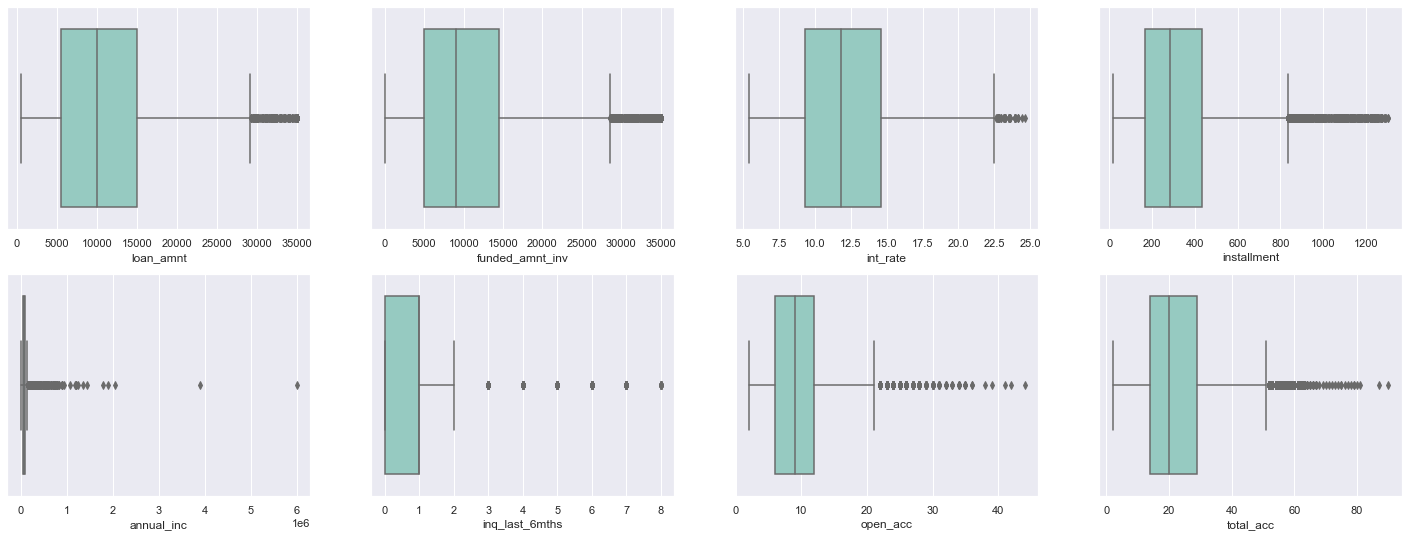

In [31]:
# Outlier Boxplots

sns.set(rc={'figure.figsize':(25,9)})

fig, axes = plt.subplots(2, 4)
axes = axes.flatten()

sns.set_style("darkgrid")

ax = sns.boxplot(x=loan_dataframe["loan_amnt"], ax=axes[0], palette="Set3")
ax = sns.boxplot(x=loan_dataframe["funded_amnt_inv"], ax=axes[1], palette="Set3")
ax = sns.boxplot(x=loan_dataframe["int_rate"], ax=axes[2], palette="Set3")
ax = sns.boxplot(x=loan_dataframe["installment"],  ax=axes[3], palette="Set3")

ax = sns.boxplot(x=loan_dataframe["annual_inc"], ax=axes[4], palette="Set3")
ax = sns.boxplot(x=loan_dataframe["inq_last_6mths"], ax=axes[5], palette="Set3")
ax = sns.boxplot(x=loan_dataframe["open_acc"], ax=axes[6], palette="Set3")
ax = sns.boxplot(x=loan_dataframe["total_acc"], ax=axes[7], palette="Set3")
# Show the plot.
plt.show()

#['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'inq_last_6mths', 'open_acc', 'total_acc']

In [32]:
loan_dataframe = loan_dataframe[np.abs(stats.zscore(loan_dataframe['loan_amnt'])) < 3]
loan_dataframe = loan_dataframe[np.abs(stats.zscore(loan_dataframe['funded_amnt_inv'])) < 3]
loan_dataframe = loan_dataframe[np.abs(stats.zscore(loan_dataframe['int_rate'])) < 3]
loan_dataframe = loan_dataframe[np.abs(stats.zscore(loan_dataframe['installment'])) < 3]

loan_dataframe = loan_dataframe[np.abs(stats.zscore(loan_dataframe['annual_inc'])) < 3]
loan_dataframe = loan_dataframe[np.abs(stats.zscore(loan_dataframe['inq_last_6mths'])) < 3]
loan_dataframe = loan_dataframe[np.abs(stats.zscore(loan_dataframe['open_acc'])) < 3]
loan_dataframe = loan_dataframe[np.abs(stats.zscore(loan_dataframe['total_acc'])) < 3]
loan_dataframe.shape

(36183, 18)

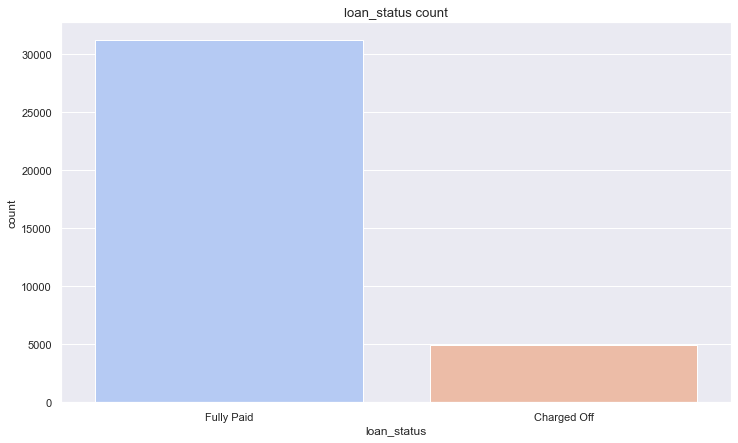

In [33]:
# Categorical Loan Status

plt.figure(figsize=(12,7))

sns.set_style("darkgrid")

ax = sns.countplot(x='loan_status',
                  data=loan_dataframe,            
                  palette = 'coolwarm'
                 )
# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='loan_status', ylabel='count')

# Chart Title.
ax.set_title("loan_status count")

ax.set_xticklabels(['Fully Paid','Charged Off'])

# Show the plot.
plt.show()


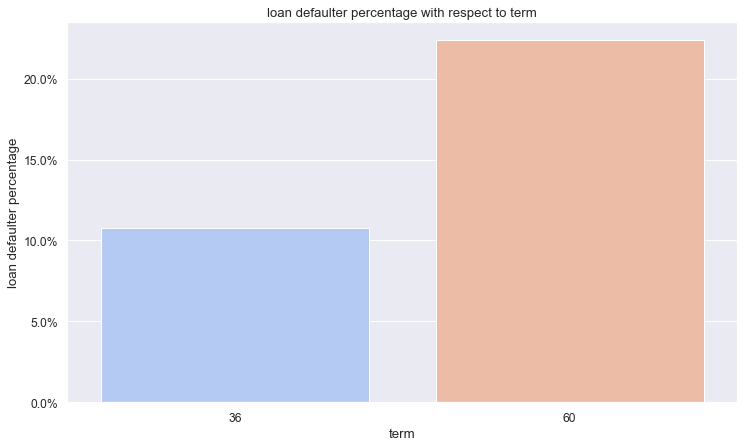

In [34]:
# Categorical Term

import matplotlib.ticker as mtick


plt.figure(figsize=(12,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'term',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x)    
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='term', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

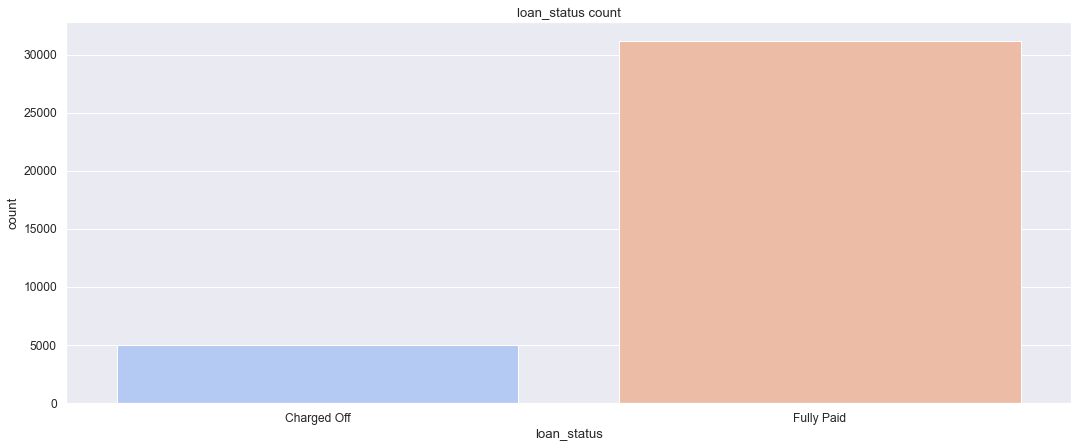

In [35]:
# Categorical Loan Status

plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.countplot(
                   x='loan_status',
                   data=loan_dataframe,
                   order=[1,0],
                   palette = 'coolwarm'    
                 )
# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='loan_status', ylabel='count')

# Chart Title.
ax.set_title("loan_status count")

ax.set_xticklabels(['Charged Off', 'Fully Paid'])

# Show the plot.
plt.show()

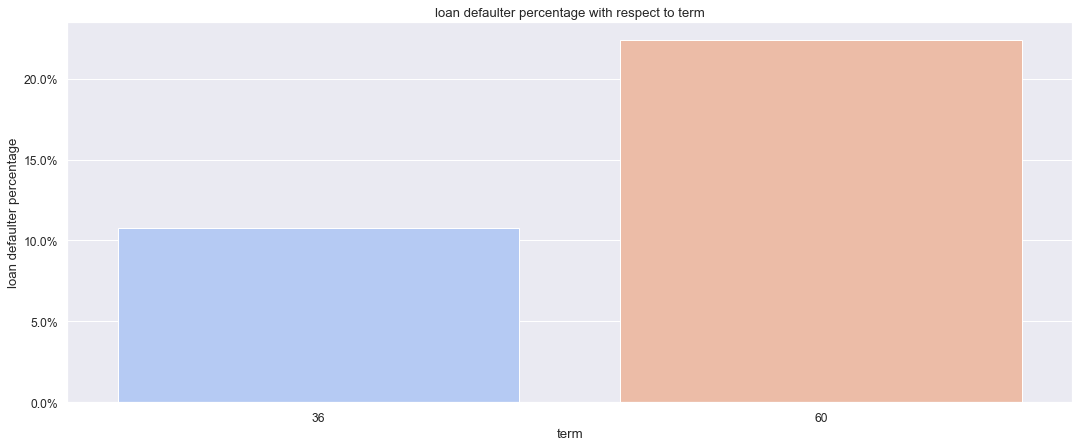

In [36]:
# Categorical Term


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'term',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['term'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='term', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

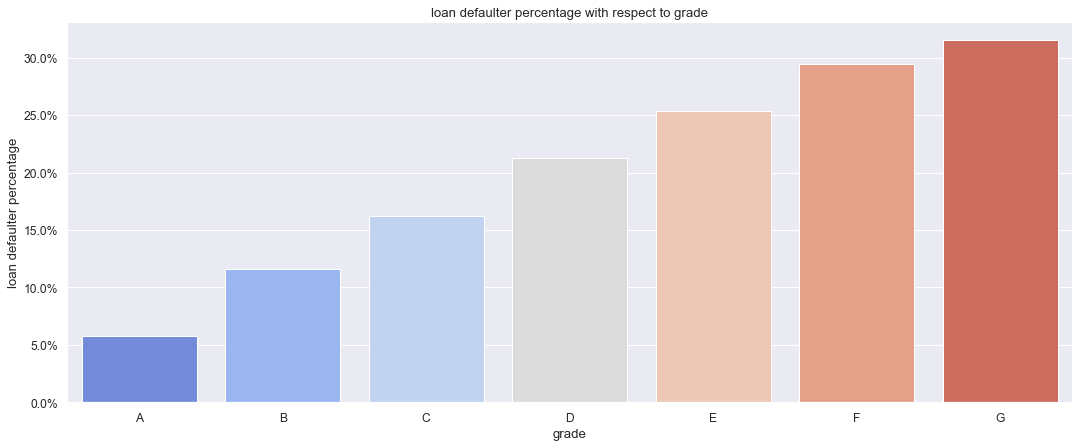

In [37]:
# Categorical Grade


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'grade',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['grade'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='grade', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to grade")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()


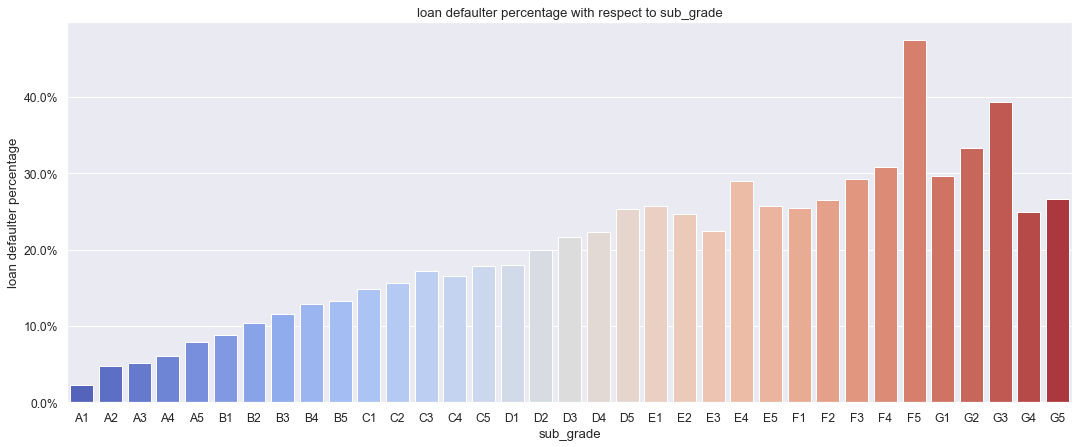

In [38]:
# Categorical Sub Grade


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'sub_grade',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['sub_grade'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='sub_grade', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to sub_grade")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()


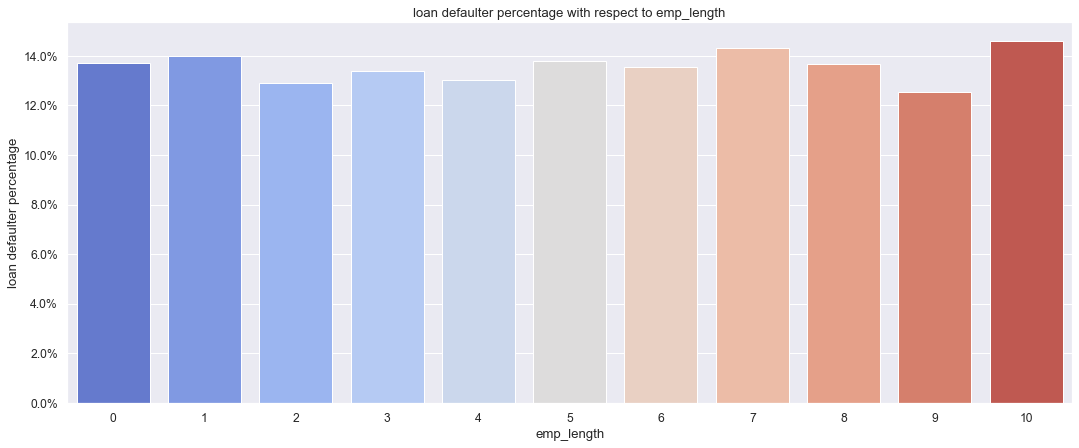

In [39]:
# Categorical emp_length


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'emp_length',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['emp_length'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='emp_length', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to emp_length")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()



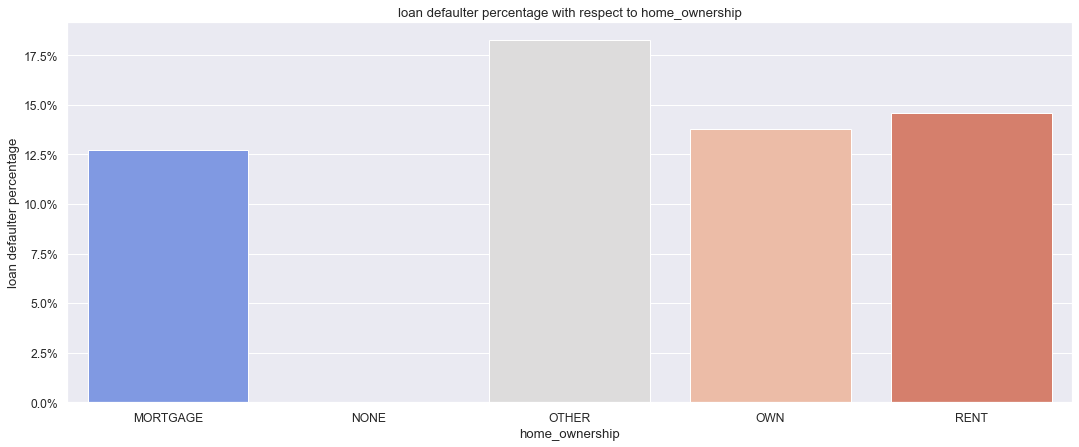

In [40]:
# Categorical home_ownership


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'home_ownership',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['home_ownership'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='home_ownership', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to home_ownership")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()


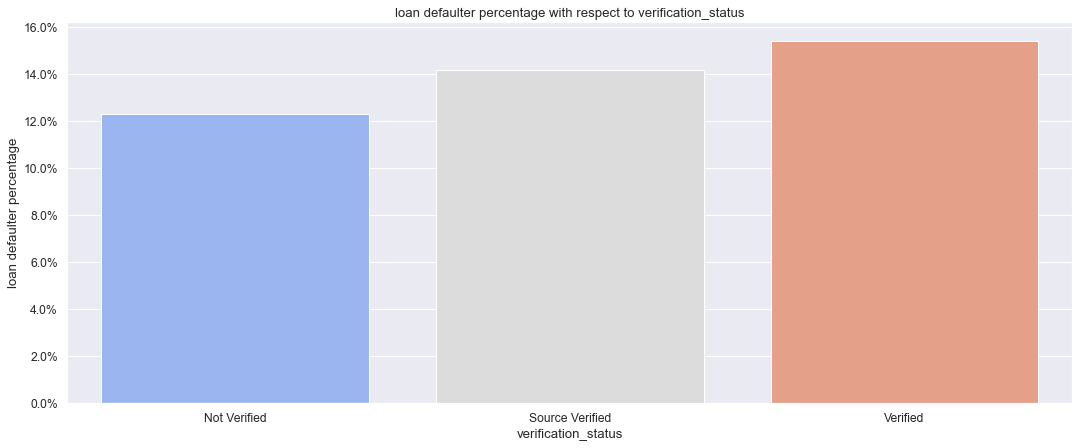

In [41]:
# Categorical verification_status


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'verification_status',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['verification_status'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='verification_status', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to verification_status")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()


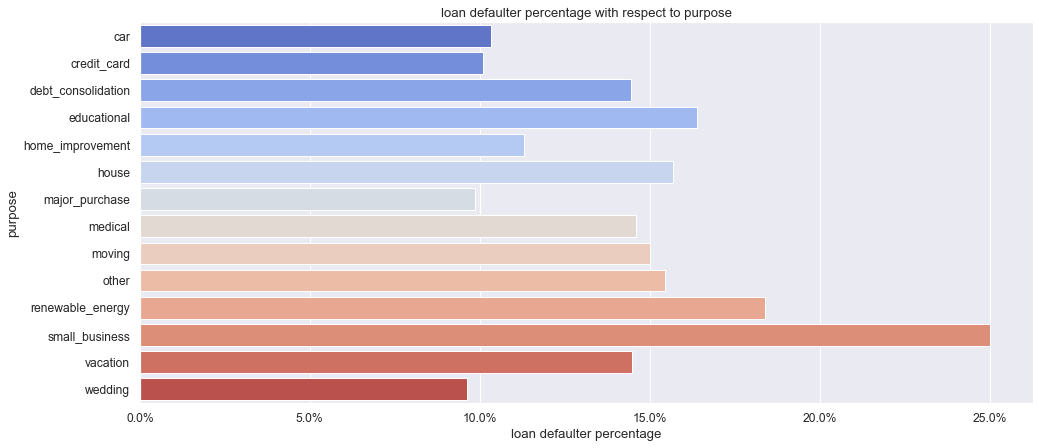

In [42]:
# Categorical purpose


import matplotlib.ticker as mtick


plt.figure(figsize=(16,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_status',
           y = 'purpose',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['purpose'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='loan defaulter percentage', ylabel='purpose')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to purpose")

ax.xaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

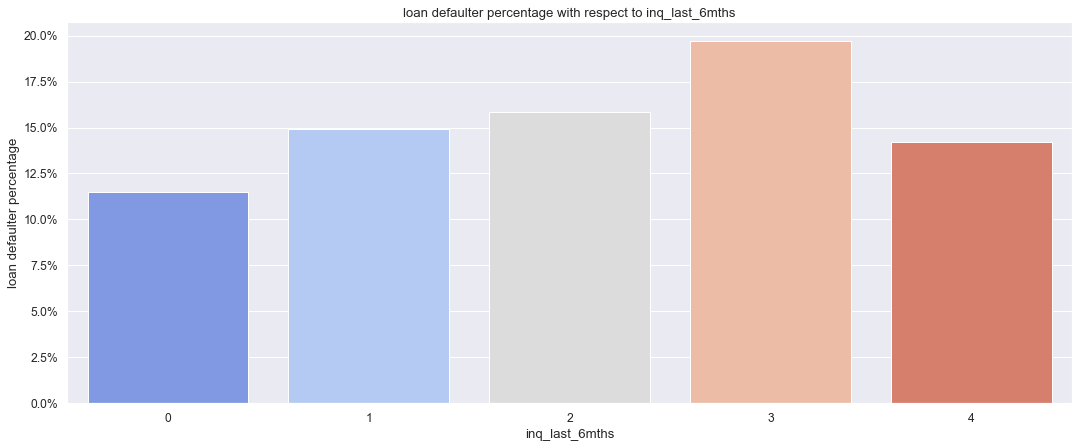

In [43]:
# Categorical inq_last_6mths


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'inq_last_6mths',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['inq_last_6mths'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='inq_last_6mths', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to inq_last_6mths")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()


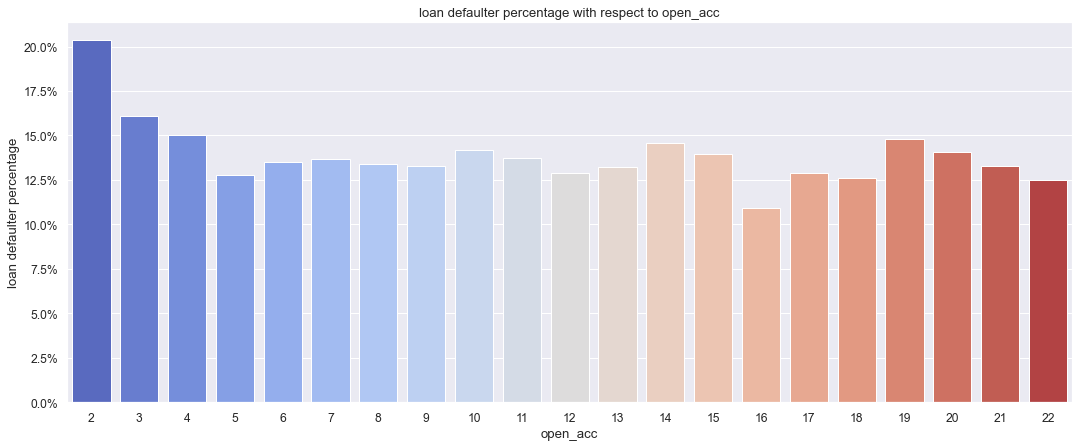

In [44]:
# Categorical open_acc


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'open_acc',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['open_acc'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='open_acc', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to open_acc")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

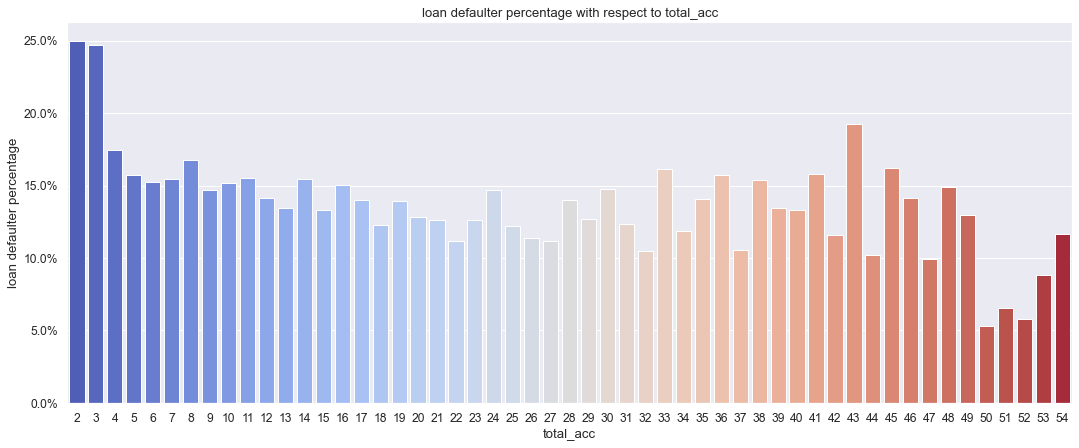

In [45]:
# Categorical total_acc

plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'total_acc',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['total_acc'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='total_acc', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to total_acc")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

In [46]:
np.min(loan_dataframe.loan_amnt),np.max(loan_dataframe.loan_amnt)
# Bins for loan_amnt_bin

loan_dataframe['loan_amnt_bin'] = np.where(loan_dataframe['loan_amnt']>=30000,'LA7:30000+',
                                     np.where(loan_dataframe['loan_amnt']>=25000,'LA6:25000-30000',
                                         np.where(loan_dataframe['loan_amnt']>=20000,'LA5:20000-25000',
                                             np.where(loan_dataframe['loan_amnt']>=15000,'LA4:15000-20000',
                                                 np.where(loan_dataframe['loan_amnt']>=10000,'LA3:10000-15000',
                                                     np.where(loan_dataframe['loan_amnt']>=5000,'LA2:5000-10000',
                                                         'LA1:0-5000'))))))

np.min(loan_dataframe.funded_amnt_inv),np.max(loan_dataframe.funded_amnt_inv)
# Bins for funded_amnt_inv_bin

loan_dataframe['funded_amnt_inv_bin'] = np.where(loan_dataframe['funded_amnt_inv']>=25000,'FA7:25000+',
                                     np.where(loan_dataframe['funded_amnt_inv']>=20000,'FA6:20000-25000',
                                         np.where(loan_dataframe['funded_amnt_inv']>=15000,'FA5:15000-20000',
                                             np.where(loan_dataframe['funded_amnt_inv']>=10000,'FA4:10000-15000',
                                                 np.where(loan_dataframe['funded_amnt_inv']>=5000,'FA3:5000-10000',
                                                     np.where(loan_dataframe['funded_amnt_inv']>=1000,'FA2:1000-50000',
                                                         'FA1:0-1000'))))))

np.min(loan_dataframe.int_rate),np.max(loan_dataframe.int_rate)
# Bins for int_rate_bin

loan_dataframe['int_rate_bin'] = np.where(loan_dataframe['int_rate']>=20.00,'IR7:20.00+',
                                     np.where(loan_dataframe['int_rate']>=17.00,'IR6:17.00-20.00',
                                         np.where(loan_dataframe['int_rate']>=14.00,'IR5:14.00-17.00',
                                             np.where(loan_dataframe['int_rate']>=11.00,'IR4:11.00-14.00',
                                                 np.where(loan_dataframe['int_rate']>=8.00,'IR3:8.00-11.00',
                                                     np.where(loan_dataframe['int_rate']>=5.00,'IR2:5.00-8.00',
                                                         'IR1:0-5.00'))))))

np.min(loan_dataframe.installment),np.max(loan_dataframe.installment)
# Bins for installment

loan_dataframe['installment_bin'] = np.where(loan_dataframe['installment']>=700.00,'IN:700.00+',
                                     np.where(loan_dataframe['installment']>=600.00,'IN6:600.00-700.00',
                                         np.where(loan_dataframe['installment']>=500.00,'IN5:500.00-600.00',
                                             np.where(loan_dataframe['installment']>=400.00,'IN4:400.00-500.00',
                                                 np.where(loan_dataframe['installment']>=300.00,'IN3:300.00-400.00',
                                                     np.where(loan_dataframe['installment']>=200.00,'IN2:200.00-300.00',
                                                         'IN1:0-200.00'))))))

np.min(loan_dataframe.annual_inc),np.max(loan_dataframe.annual_inc)
# Bins for annual_inc_bin

loan_dataframe['annual_inc_bin'] = np.where(loan_dataframe['annual_inc']>=200000.0,'AI7:200000.0+',
                                     np.where(loan_dataframe['annual_inc']>=160000.0,'AI6:160000.0-200000.0',
                                         np.where(loan_dataframe['annual_inc']>=120000.0,'AI5:120000.0-160000.0',
                                             np.where(loan_dataframe['annual_inc']>=80000.0,'AI4:80000.0-120000.0',
                                                 np.where(loan_dataframe['annual_inc']>=40000.0,'AI3:40000.0-80000.0',
                                                     np.where(loan_dataframe['annual_inc']>=20000.0,'AI2:20000.0-40000.0',
                                                         'AI1:0-20000'))))))

np.min(loan_dataframe.revol_util),np.max(loan_dataframe.revol_util)
# Bins for revol_util_bin

loan_dataframe['revol_util_bin'] = np.where(loan_dataframe['revol_util']>=90.0,'RU7:90.0+',
                                     np.where(loan_dataframe['revol_util']>=75.0,'RU6:75.0-90.0',
                                         np.where(loan_dataframe['revol_util']>=60.0,'RU5:60.0-75.0',
                                             np.where(loan_dataframe['revol_util']>=45.0,'RU4:45.0-60.0',
                                                 np.where(loan_dataframe['revol_util']>=30.0,'RU3:15.0-30.0',
                                                     np.where(loan_dataframe['revol_util']>=15.0,'RU2:15.0-30.0',
                                                         'RU1:0-15.0'))))))

np.min(loan_dataframe.dti),np.max(loan_dataframe.dti)
# Bins for dti_bin

loan_dataframe['dti_bin'] = np.where(loan_dataframe['dti']>=20.00,'DT7:20.00+',
                                     np.where(loan_dataframe['dti']>=17.00,'DT6:17.00-20.00',
                                         np.where(loan_dataframe['dti']>=14.00,'DT5:14.00-17.00',
                                             np.where(loan_dataframe['dti']>=11.00,'DT4:11.00-14.00',
                                                 np.where(loan_dataframe['dti']>=8.00,'DT3:8.00-11.00',
                                                     np.where(loan_dataframe['dti']>=5.00,'DT2:5.00-8.00',
                                                         'DT1:0-5.00'))))))

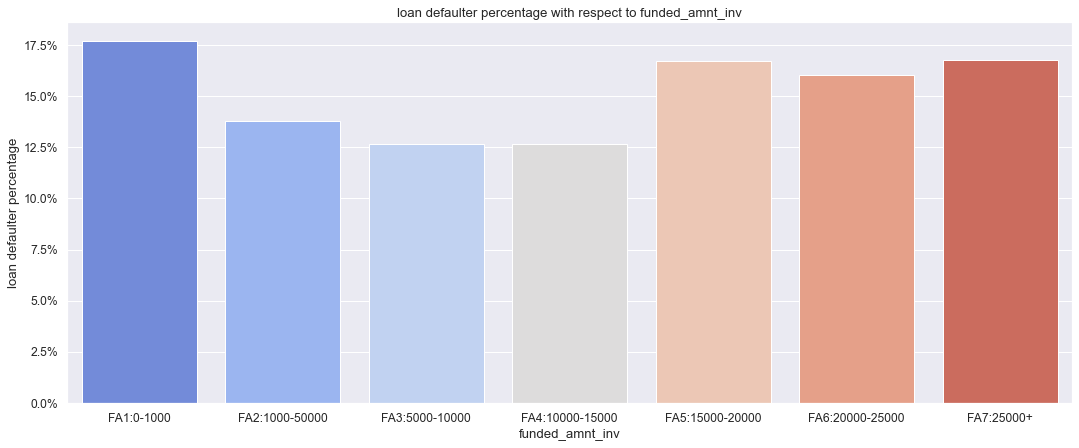

In [47]:
# Continuous loan_amnt

plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'funded_amnt_inv_bin',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['funded_amnt_inv_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='funded_amnt_inv', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to funded_amnt_inv")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()


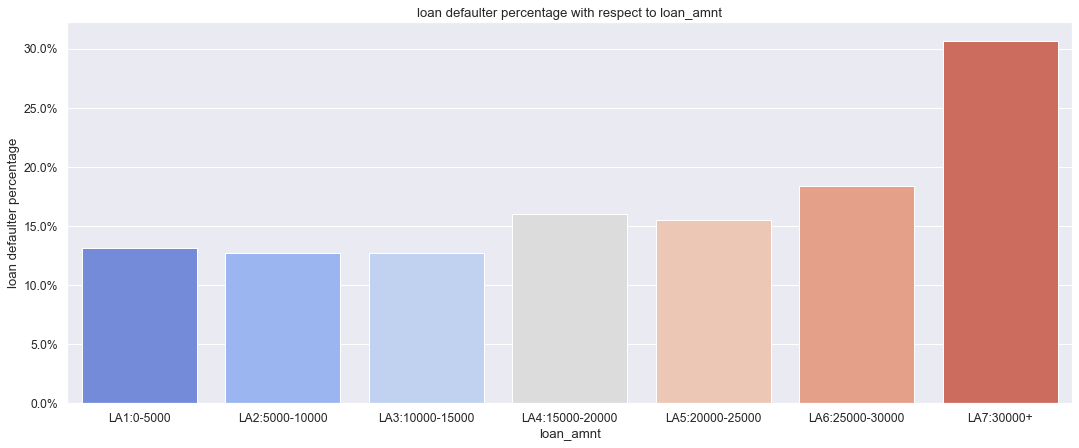

In [48]:
# Continuous loan_amnt

plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='loan_amnt', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to loan_amnt")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

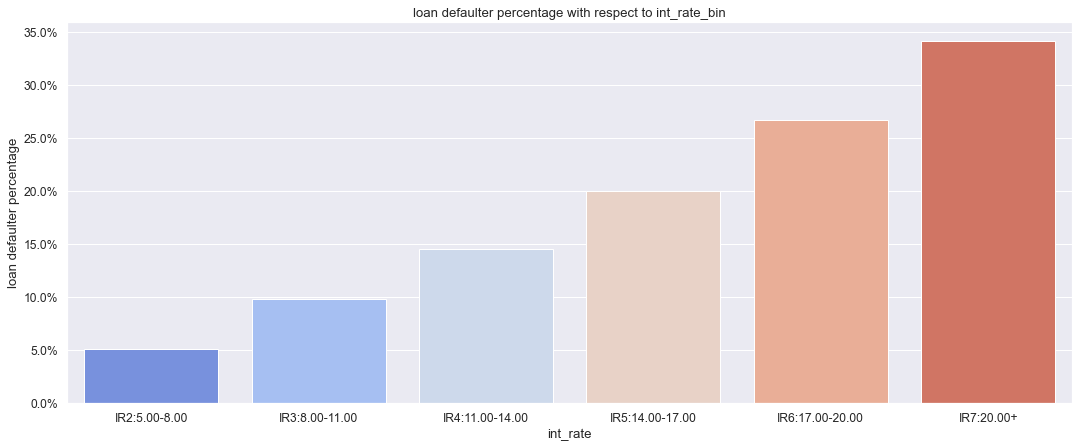

In [49]:
# Continuous int_rate

plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'int_rate_bin',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['int_rate_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='int_rate', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to int_rate_bin")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

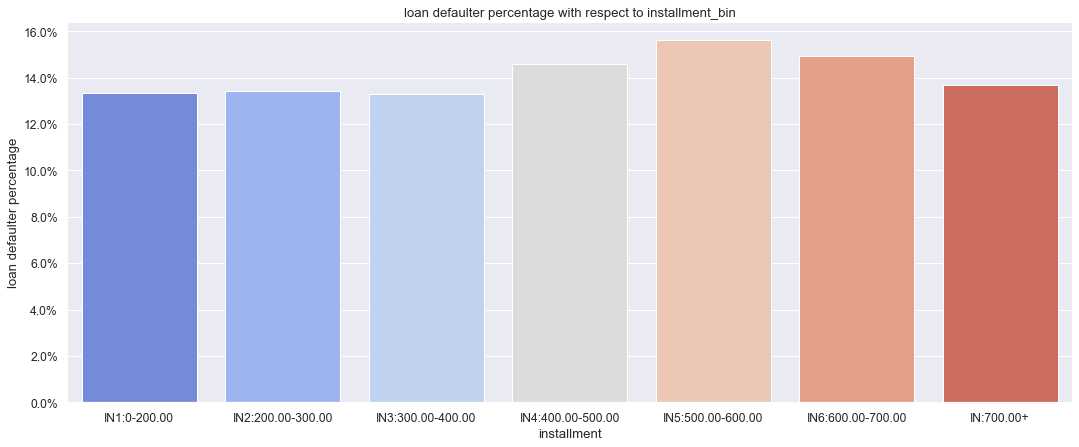

In [50]:
# Continuous installment

plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'installment_bin',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['installment_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='installment', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to installment_bin")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

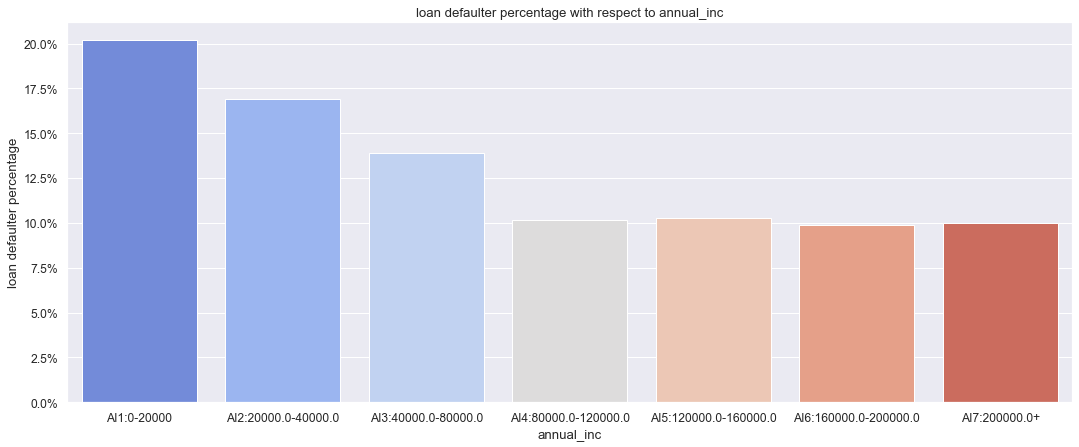

In [51]:
# Continuous annual_inc_bin

plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'annual_inc_bin',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['annual_inc_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='annual_inc', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to annual_inc")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

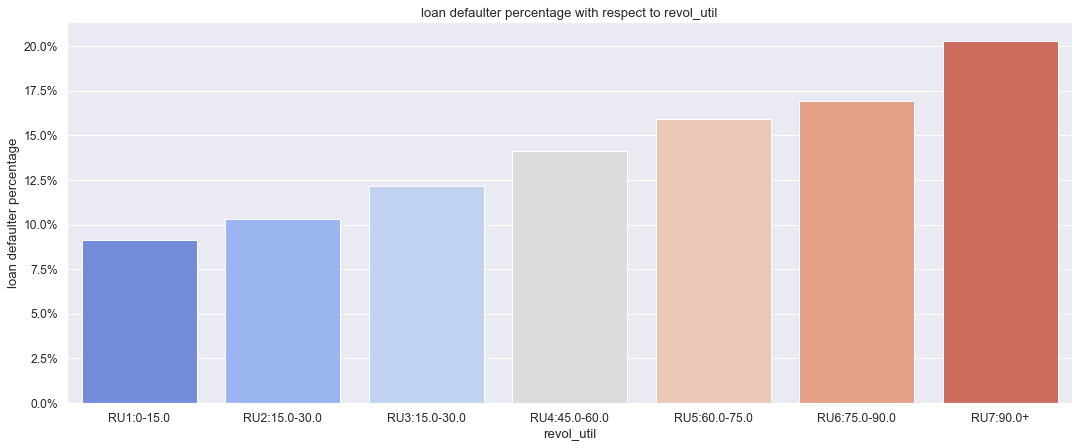

In [52]:
# Continuous revol_util_bin

plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'revol_util_bin',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['revol_util_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='revol_util', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to revol_util")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

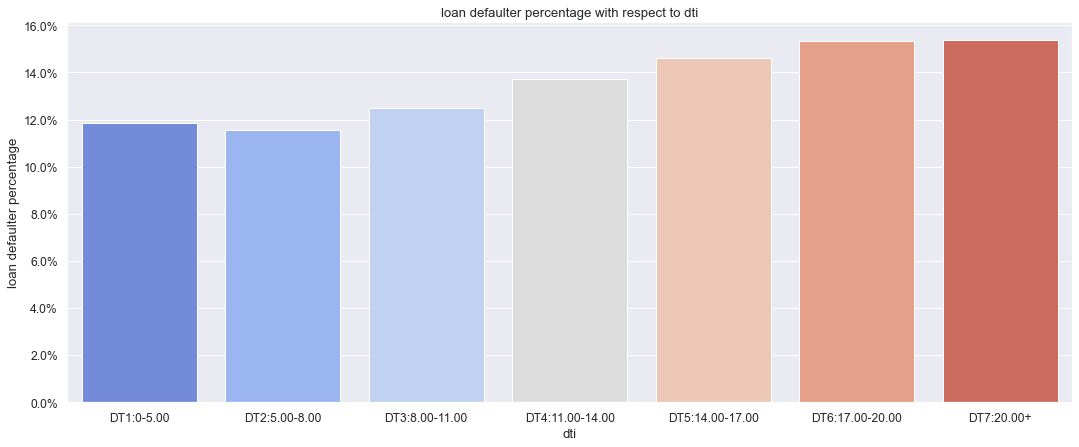

In [53]:
# Continuous dti_bin

plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'dti_bin',
           y = 'loan_status',
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['dti_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='dti', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to dti")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()


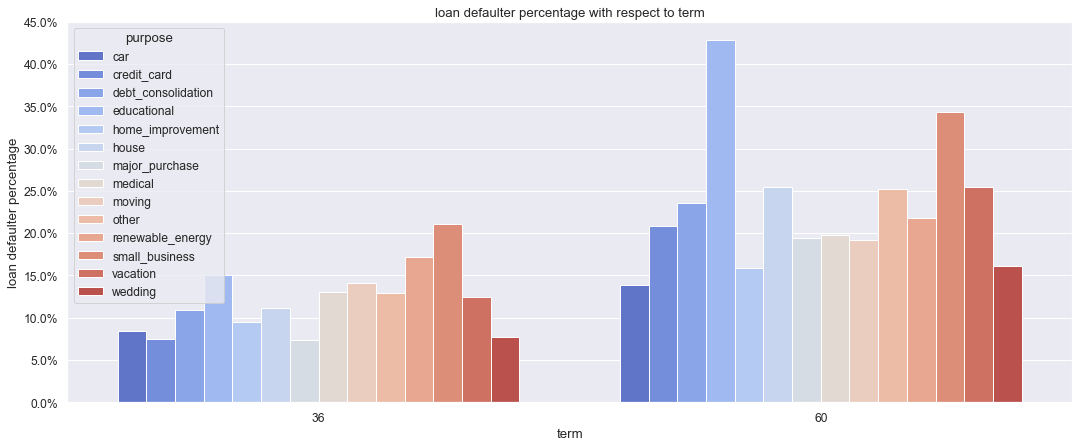

In [54]:
# Categorical Term


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'term',
           y = 'loan_status',
           hue = 'purpose',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['term'].unique()),
                 hue_order=np.sort(loan_dataframe['purpose'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='term', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()



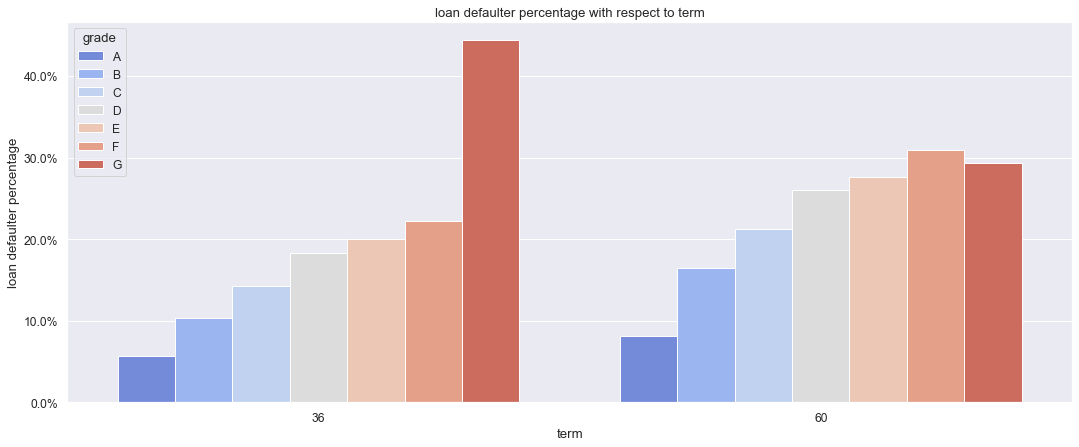

In [55]:
# Categorical Term


plt.figure(figsize=(18,7))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'term',
           y = 'loan_status',
           hue = 'grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['term'].unique()),
                 hue_order=np.sort(loan_dataframe['grade'].unique())
   )


# Font scale.
sns.set(font_scale=1.1)

# Axes Labels.
ax.set(xlabel='term', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

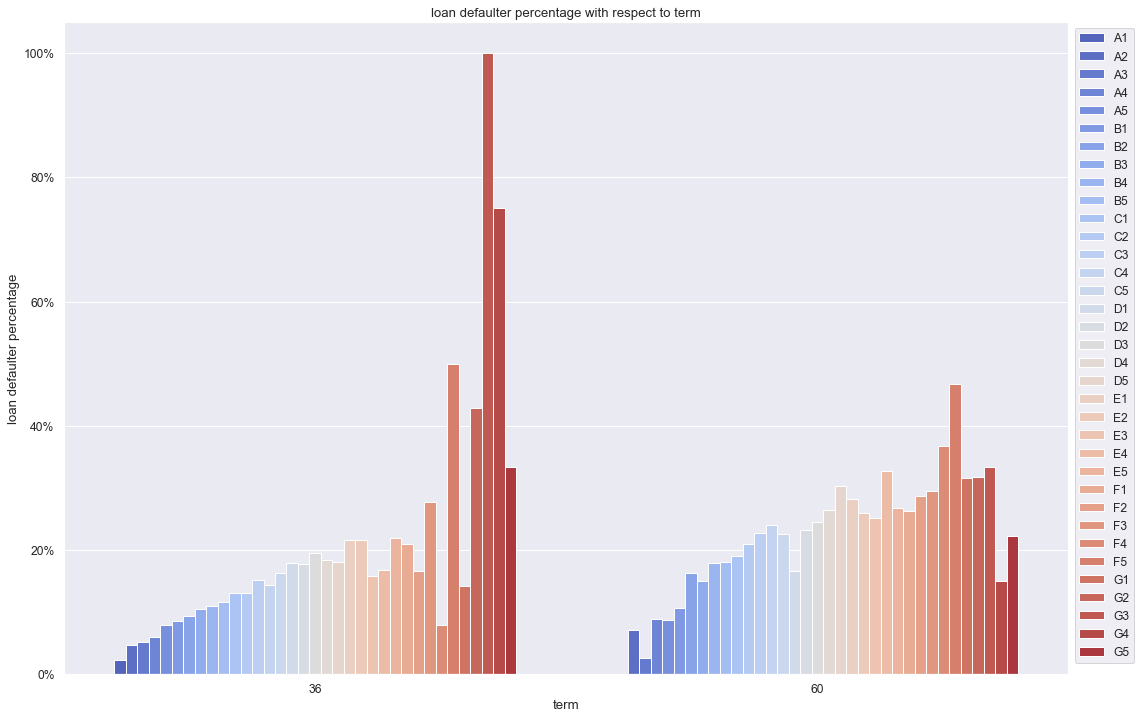

In [56]:
# Categorical Term and sub_grade
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'term',
           y = 'loan_status',
           hue = 'sub_grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['term'].unique()),
                  hue_order=np.sort(loan_dataframe['sub_grade'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='term', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()




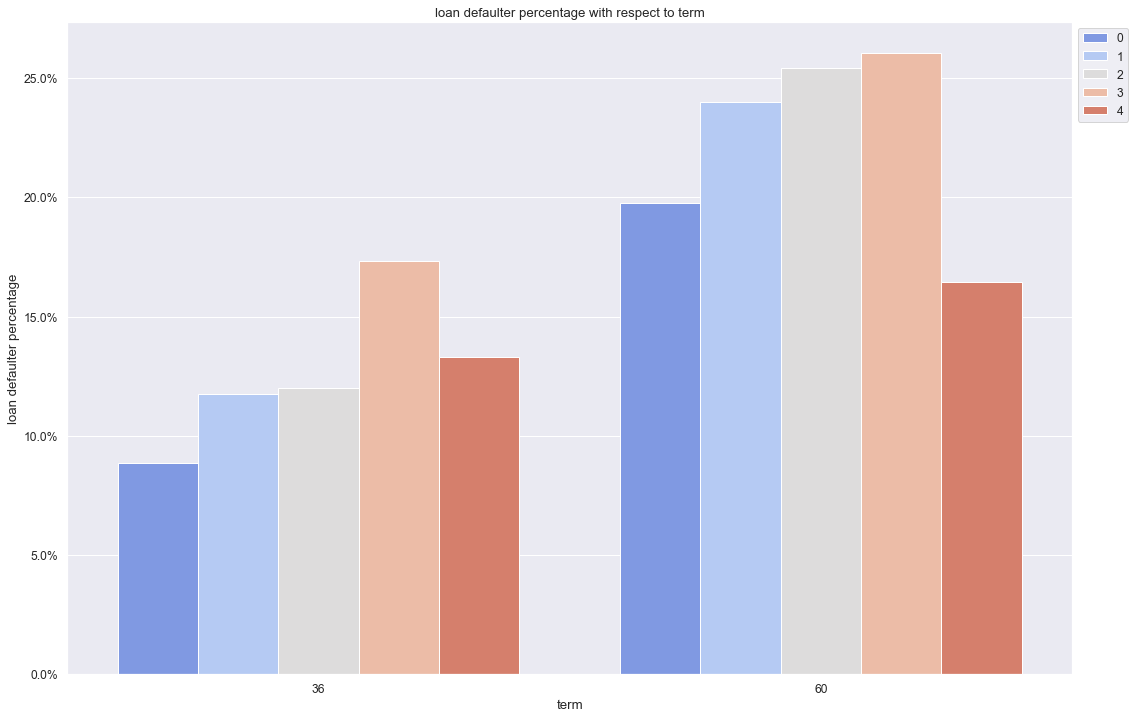

In [57]:
# Categorical Term and inq_last_6mths


plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'term',
           y = 'loan_status',
           hue = 'inq_last_6mths',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['term'].unique()),
                 hue_order=np.sort(loan_dataframe['inq_last_6mths'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='term', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


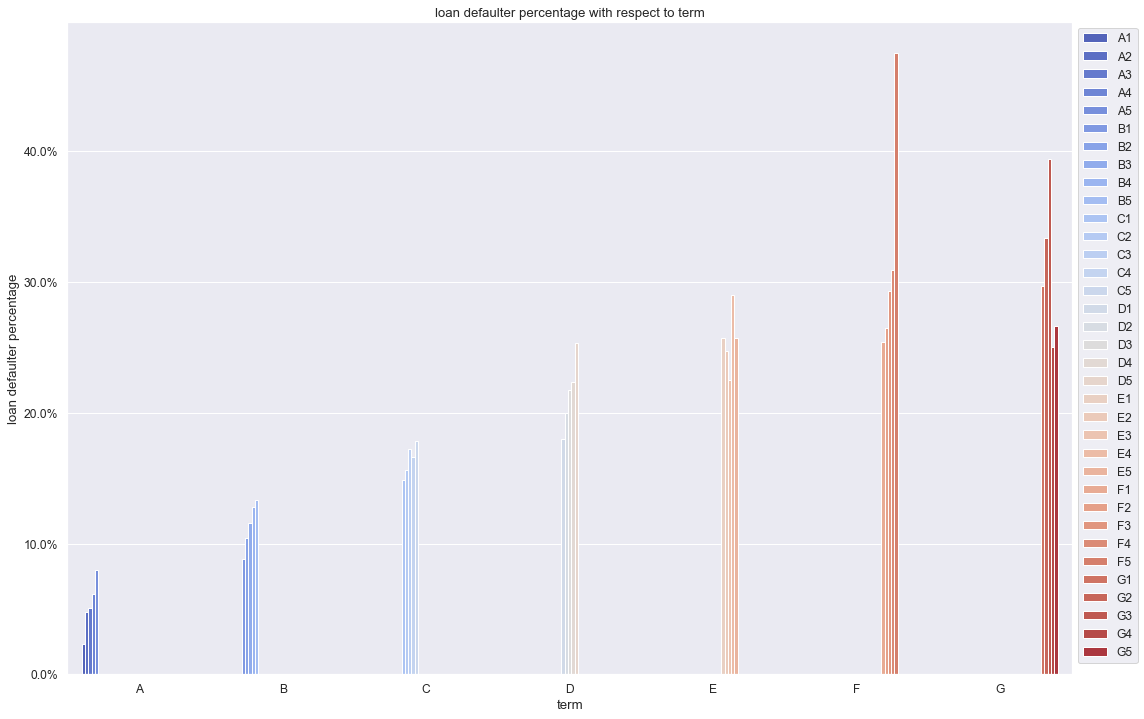

In [58]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'grade',
           y = 'loan_status',
           hue = 'sub_grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['grade'].unique()),
                 hue_order=np.sort(loan_dataframe['sub_grade'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='term', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   



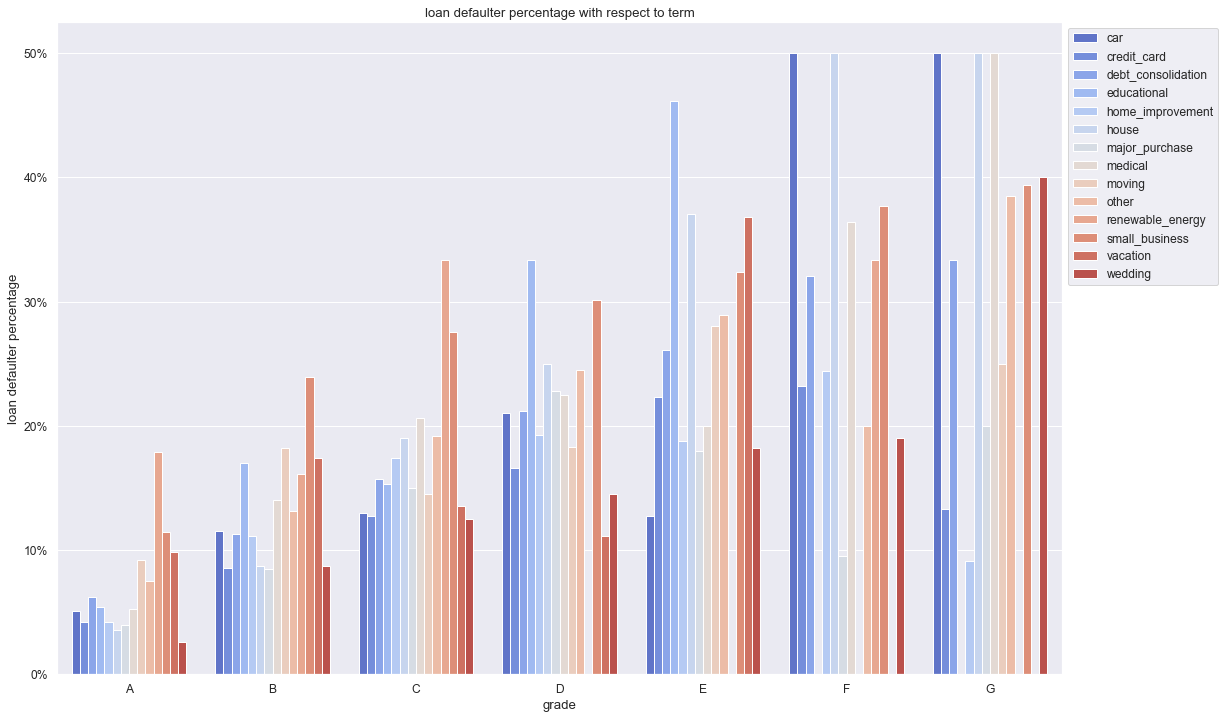

In [59]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'grade',
           y = 'loan_status',
           hue = 'purpose',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['grade'].unique()),
                 hue_order=np.sort(loan_dataframe['purpose'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='grade', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   



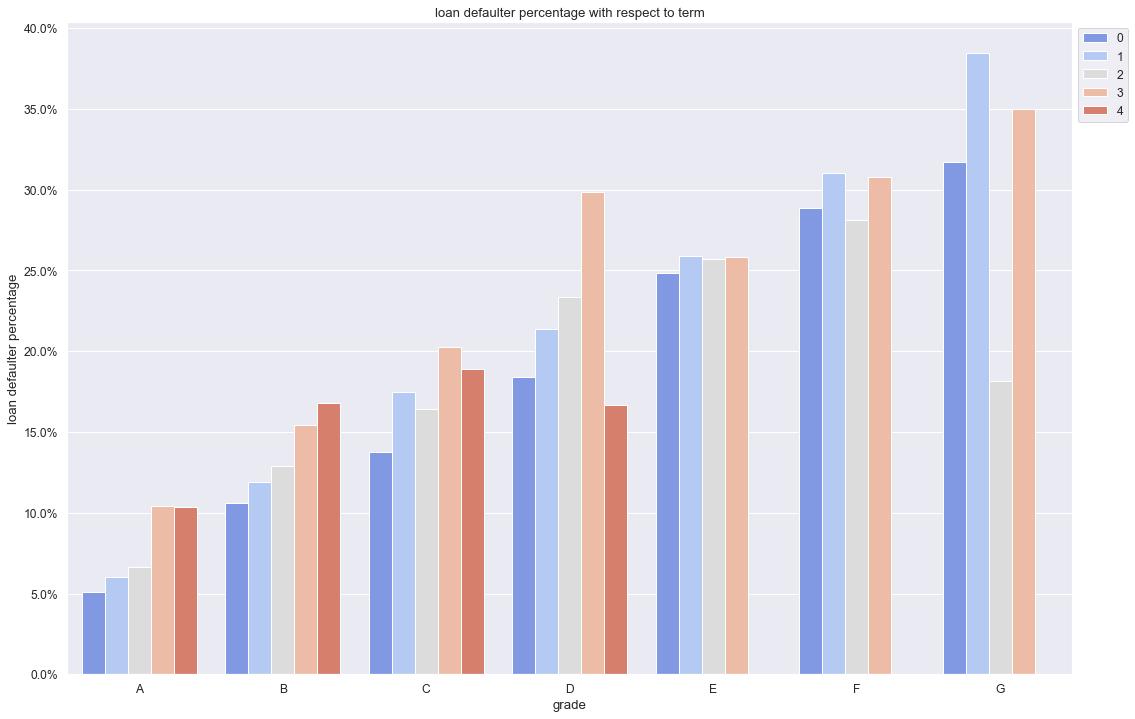

In [60]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'grade',
           y = 'loan_status',
           hue = 'inq_last_6mths',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['grade'].unique()),
           hue_order=np.sort(loan_dataframe['inq_last_6mths'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='grade', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

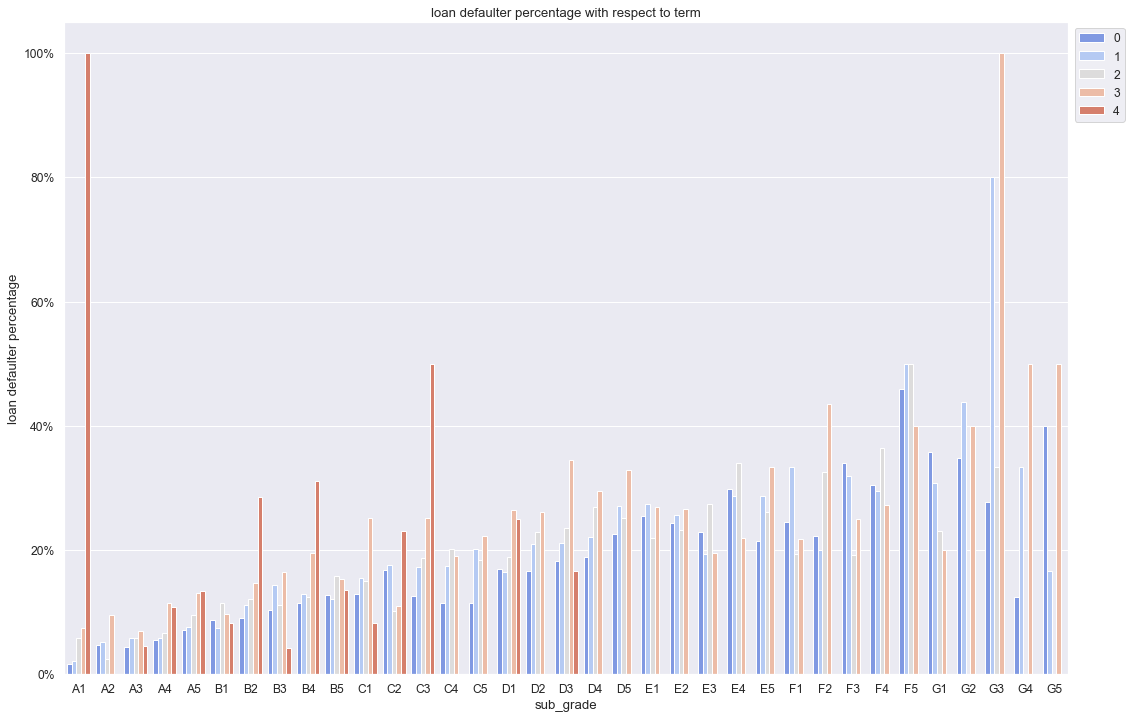

In [61]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'sub_grade',
           y = 'loan_status',
           hue = 'inq_last_6mths',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['sub_grade'].unique()),
           hue_order=np.sort(loan_dataframe['inq_last_6mths'].unique())
                 
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='sub_grade', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

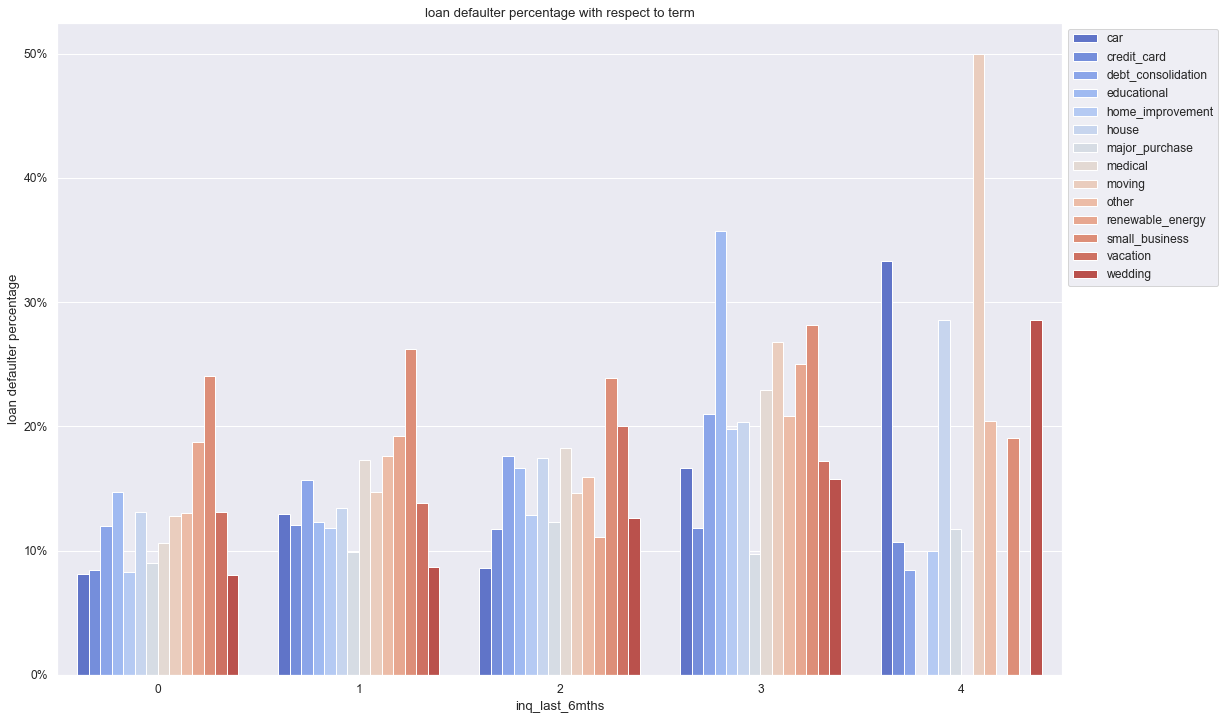

In [62]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'inq_last_6mths',
           y = 'loan_status',
           hue = 'purpose',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['inq_last_6mths'].unique()),
           hue_order=np.sort(loan_dataframe['purpose'].unique())      
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='inq_last_6mths', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

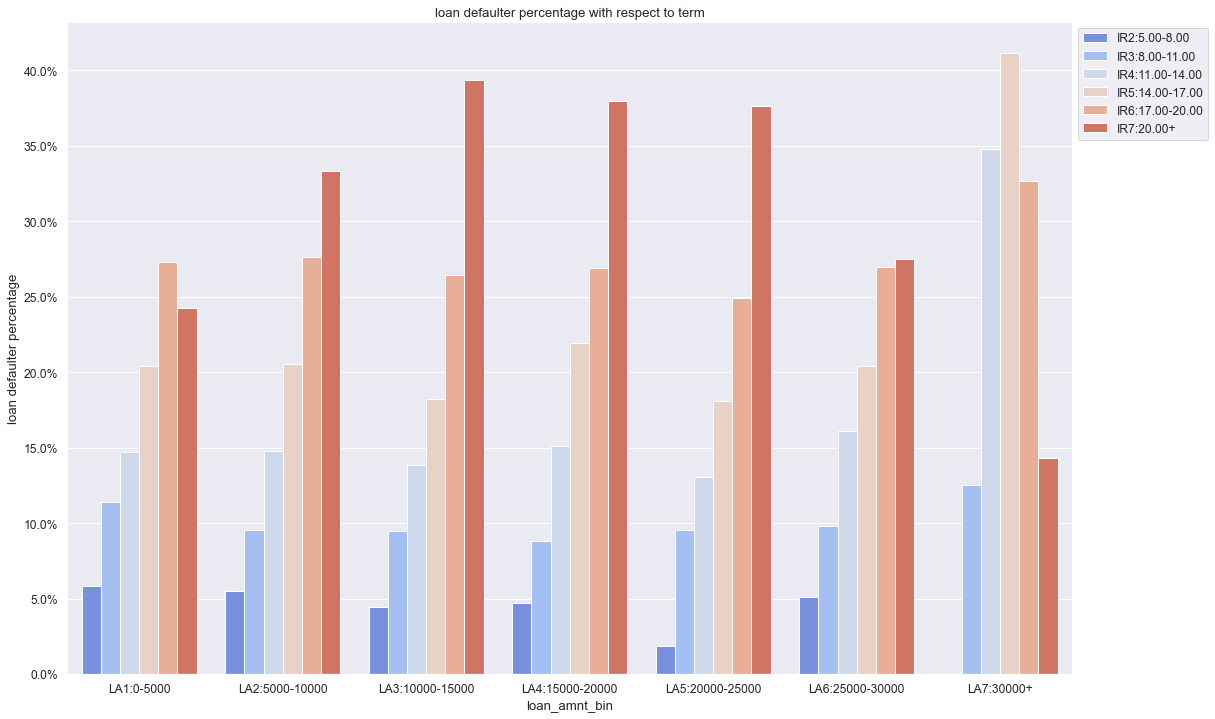

In [63]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           hue = 'int_rate_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique()),
           hue_order=np.sort(loan_dataframe['int_rate_bin'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='loan_amnt_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

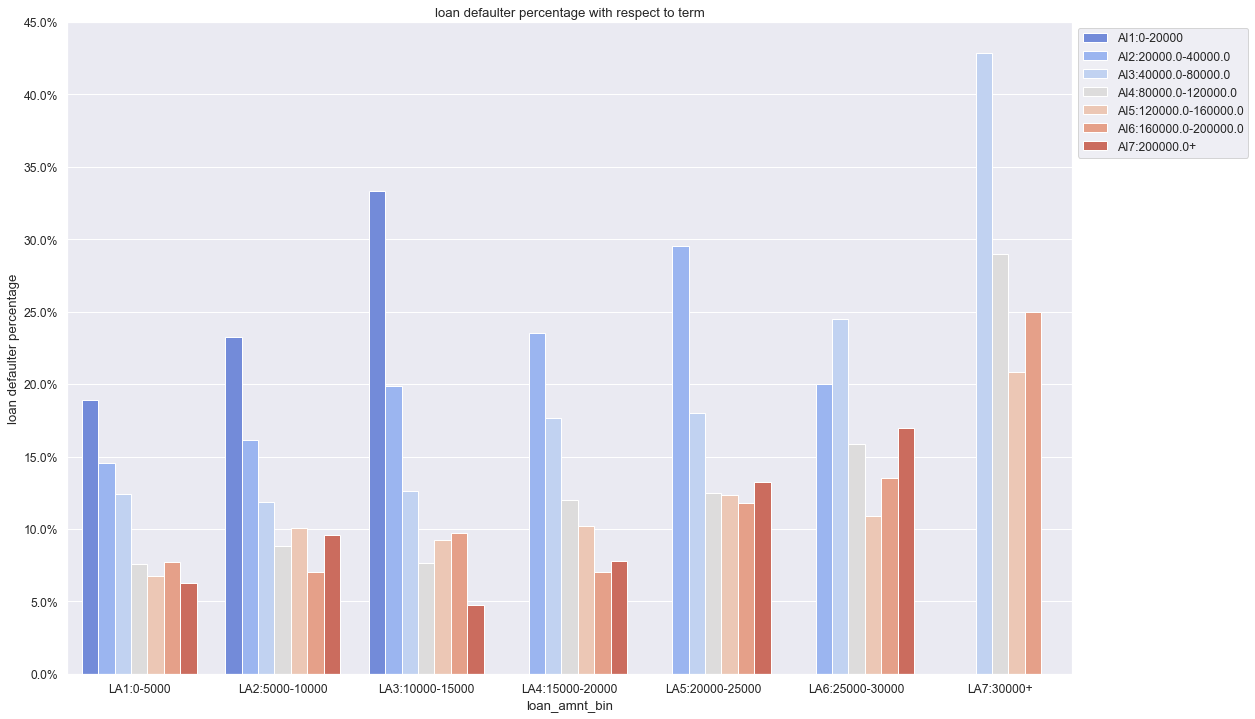

In [64]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           hue = 'annual_inc_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique()),
           hue_order=np.sort(loan_dataframe['annual_inc_bin'].unique())
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='loan_amnt_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


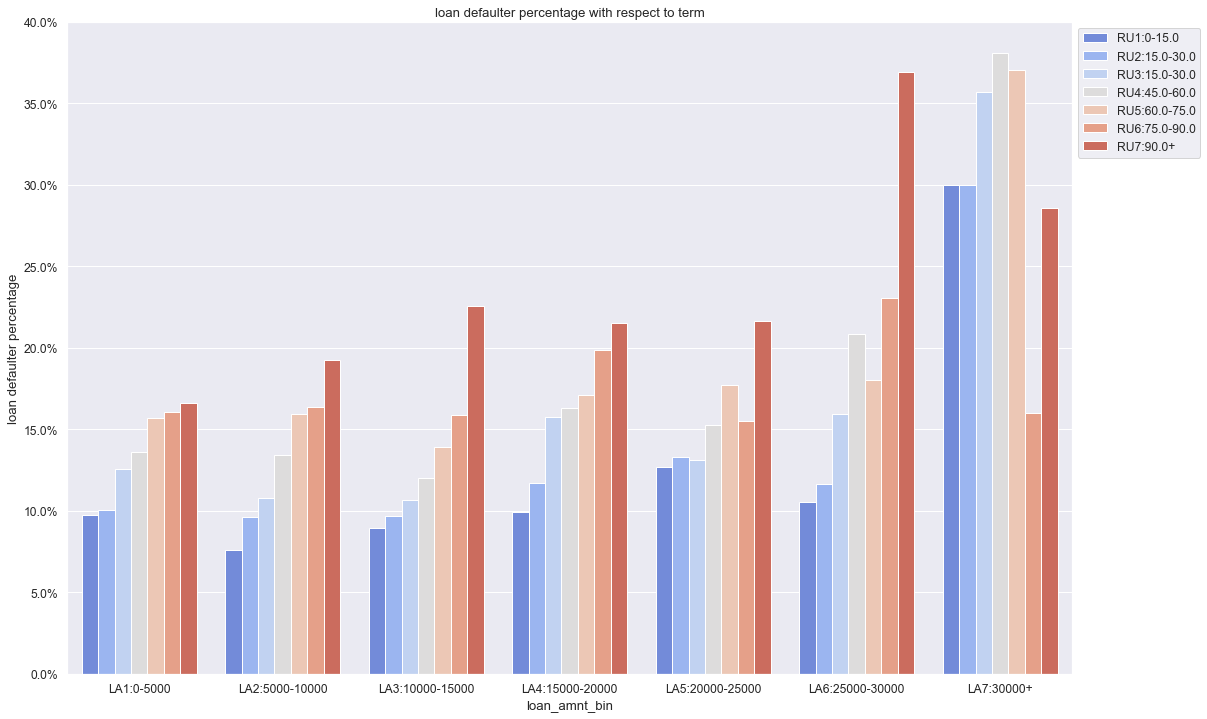

In [65]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           hue = 'revol_util_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique()),
           hue_order=np.sort(loan_dataframe['revol_util_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='loan_amnt_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


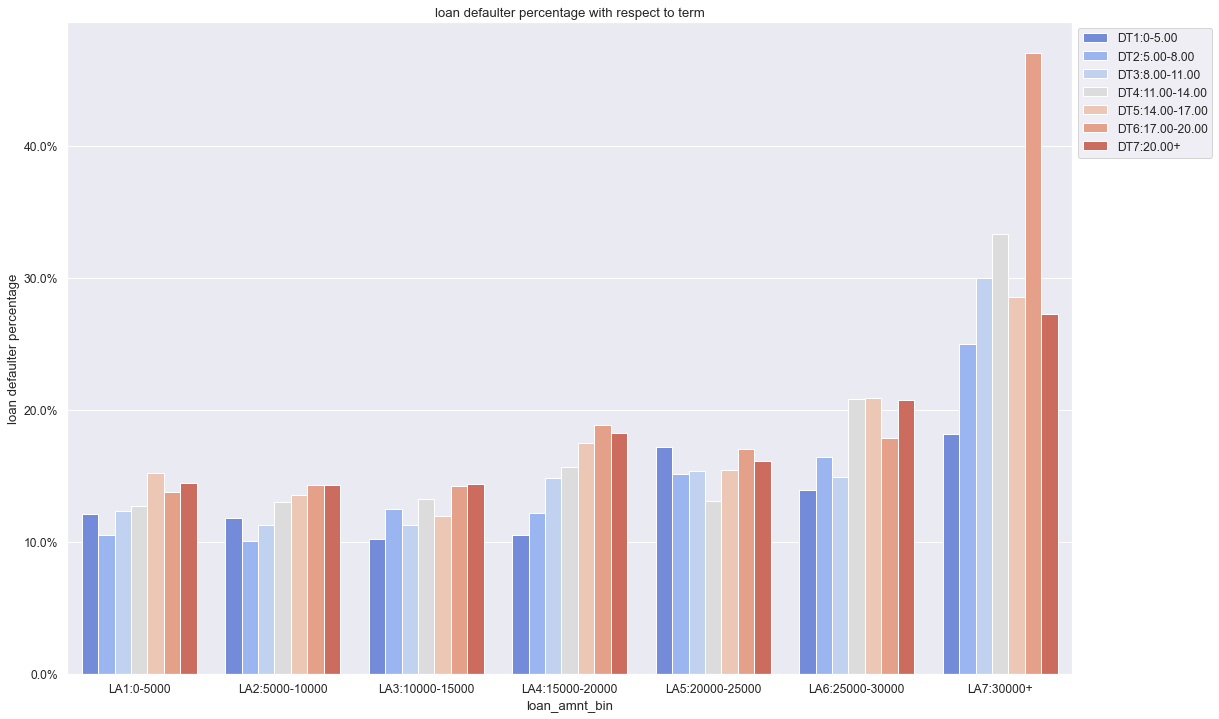

In [66]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           hue = 'dti_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique()),
           hue_order=np.sort(loan_dataframe['dti_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='loan_amnt_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


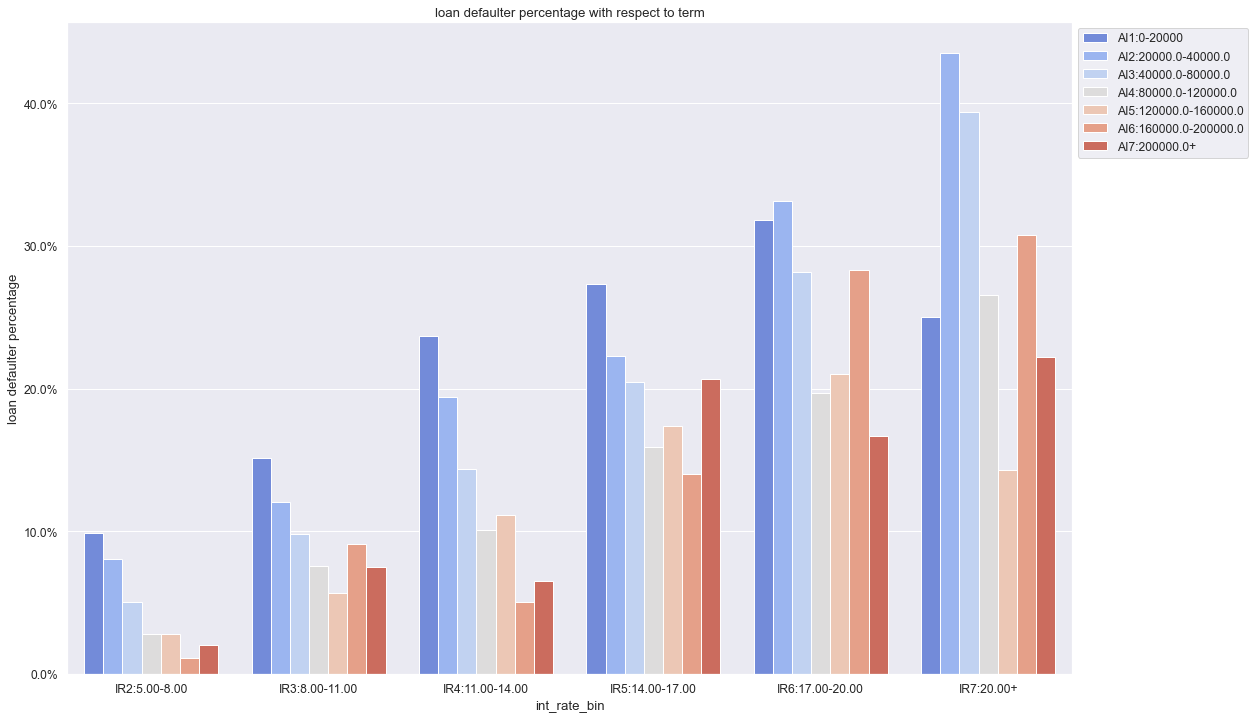

In [67]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'int_rate_bin',
           y = 'loan_status',
           hue = 'annual_inc_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['int_rate_bin'].unique()),
           hue_order=np.sort(loan_dataframe['annual_inc_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='int_rate_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


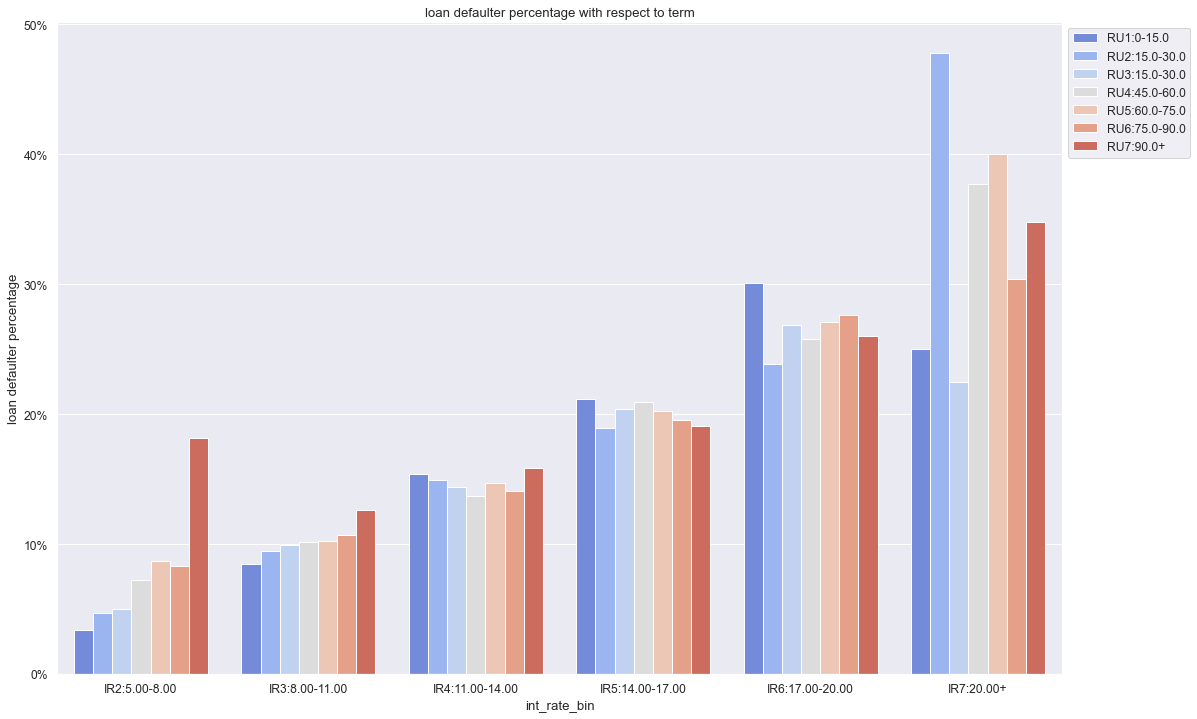

In [68]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'int_rate_bin',
           y = 'loan_status',
           hue = 'revol_util_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['int_rate_bin'].unique()),
           hue_order=np.sort(loan_dataframe['revol_util_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='int_rate_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

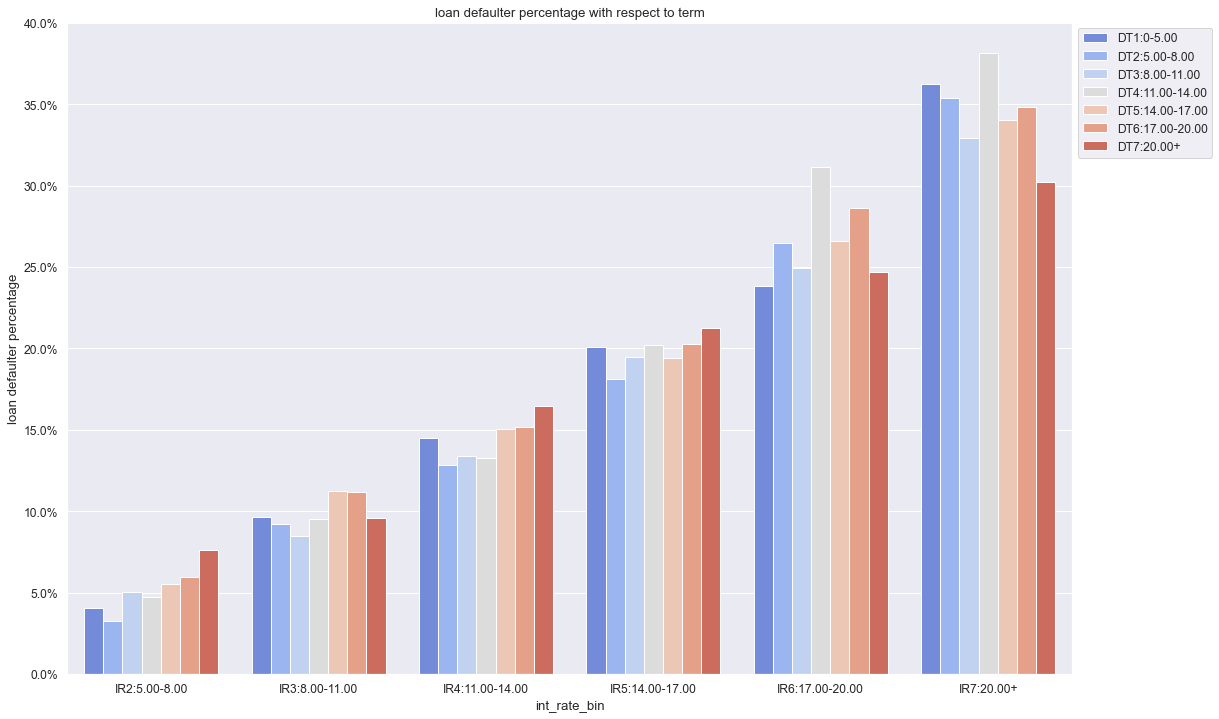

In [69]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'int_rate_bin',
           y = 'loan_status',
           hue = 'dti_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['int_rate_bin'].unique()),
           hue_order=np.sort(loan_dataframe['dti_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='int_rate_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

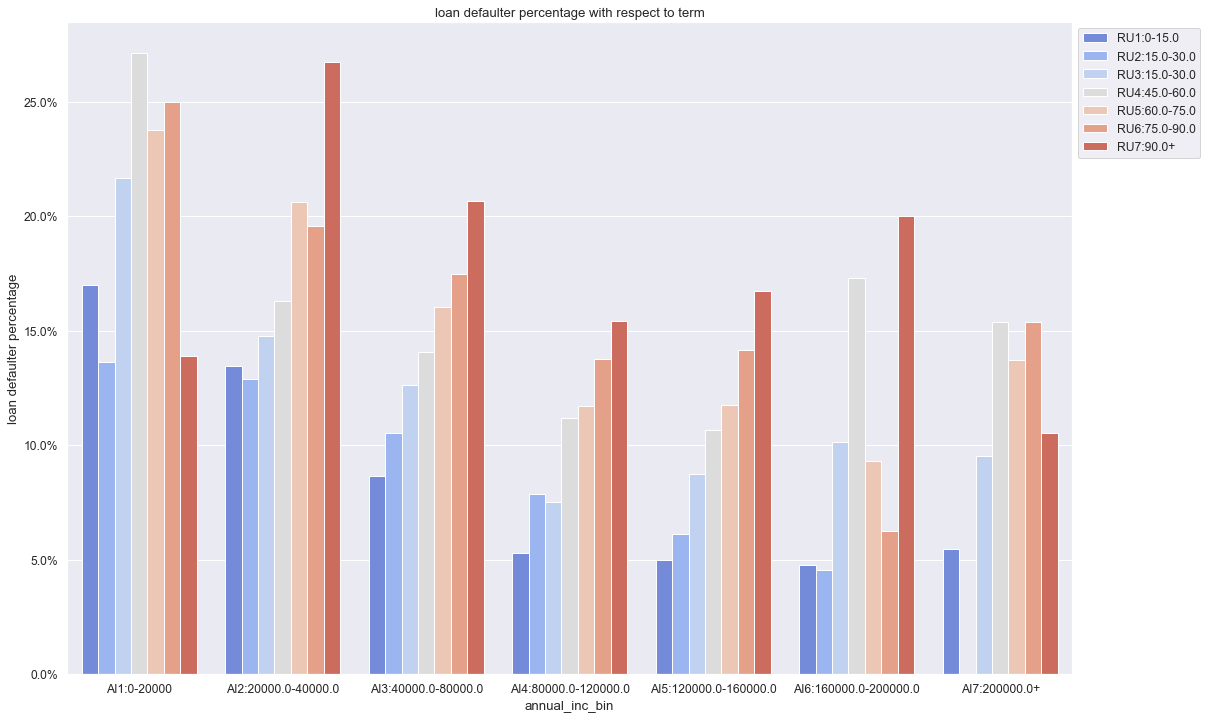

In [70]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'annual_inc_bin',
           y = 'loan_status',
           hue = 'revol_util_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['annual_inc_bin'].unique()),
           hue_order=np.sort(loan_dataframe['revol_util_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='annual_inc_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

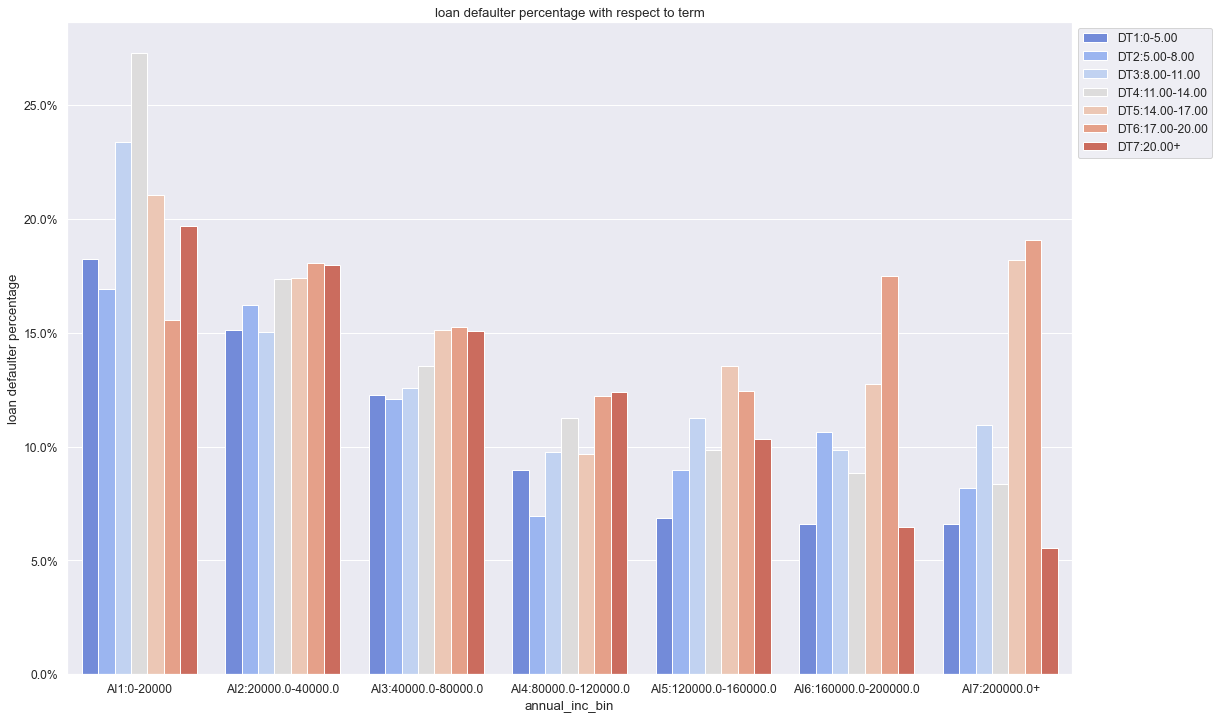

In [71]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'annual_inc_bin',
           y = 'loan_status',
           hue = 'dti_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['annual_inc_bin'].unique()),
           hue_order=np.sort(loan_dataframe['dti_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='annual_inc_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

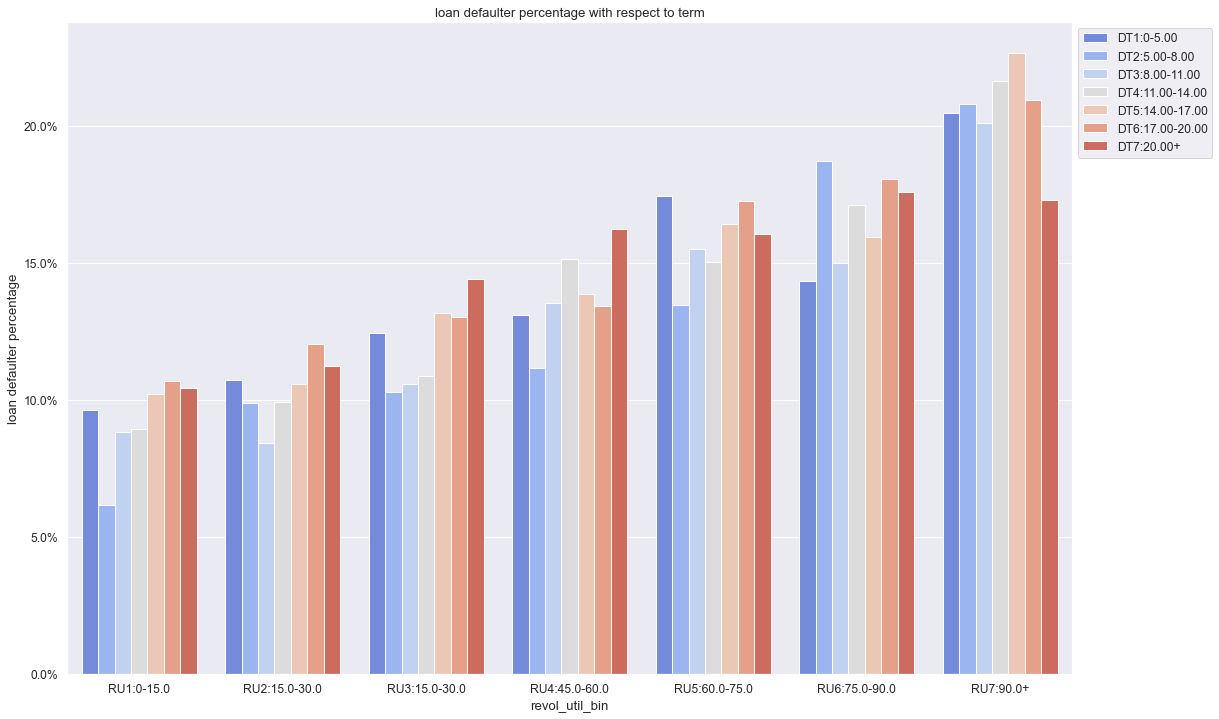

In [72]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'revol_util_bin',
           y = 'loan_status',
           hue = 'dti_bin',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['revol_util_bin'].unique()),
           hue_order=np.sort(loan_dataframe['dti_bin'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='revol_util_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

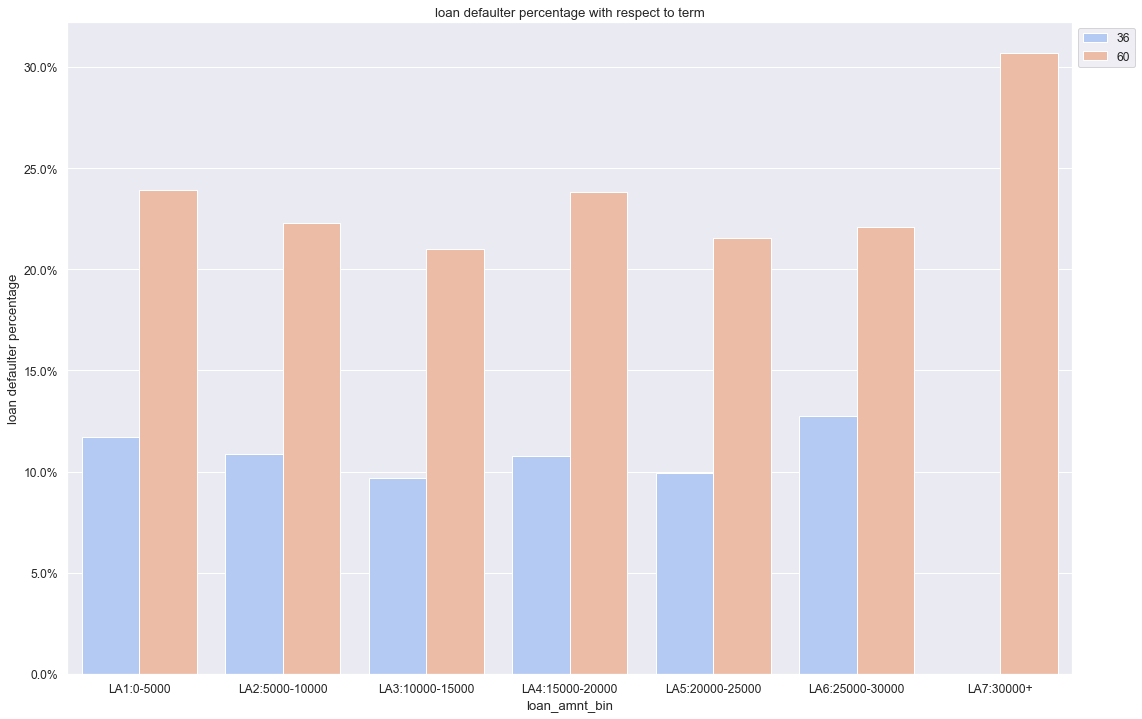

In [73]:
# Categorical term and loan_amnt_bin


plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           hue = 'term',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique()),
           hue_order=np.sort(loan_dataframe['term'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='loan_amnt_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

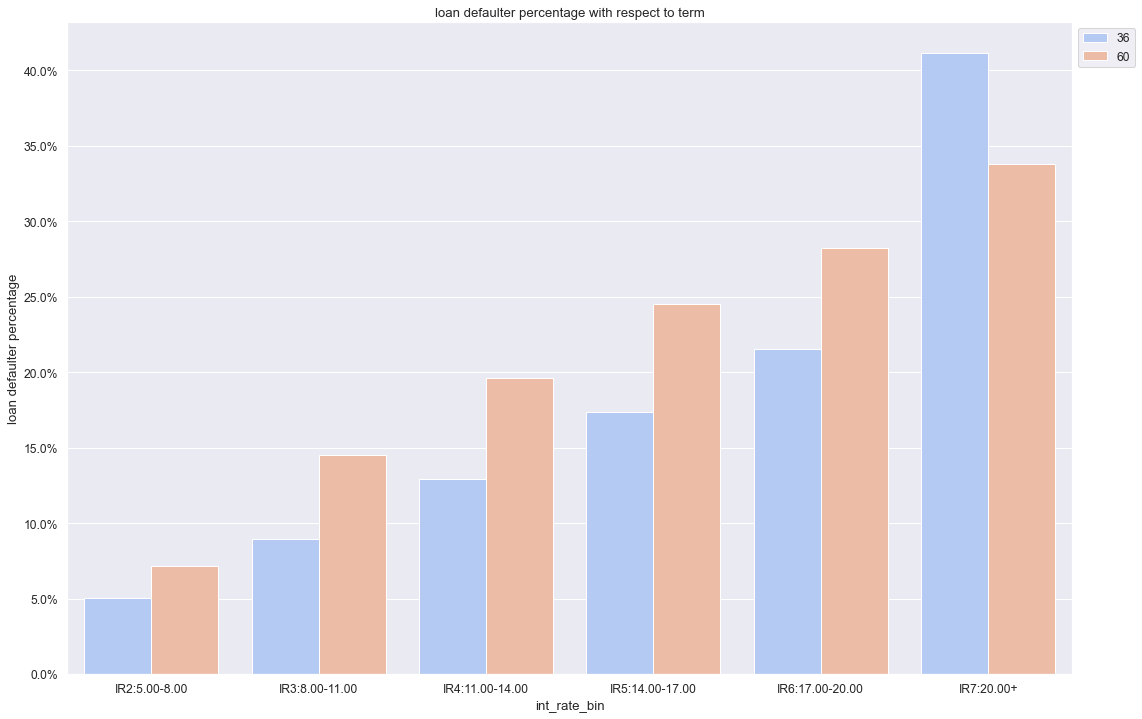

In [76]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'int_rate_bin',
           y = 'loan_status',
           hue = 'term',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['int_rate_bin'].unique()),
           hue_order=np.sort(loan_dataframe['term'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='int_rate_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

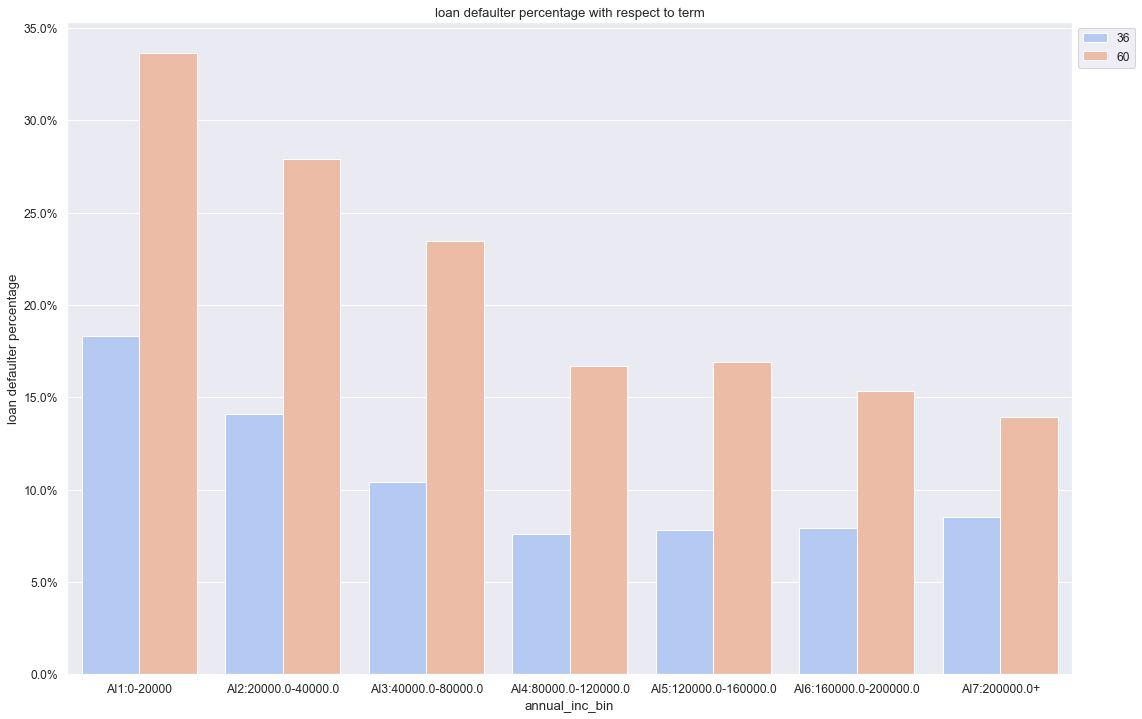

In [78]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'annual_inc_bin',
           y = 'loan_status',
           hue = 'term',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['annual_inc_bin'].unique()),
           hue_order=np.sort(loan_dataframe['term'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='annual_inc_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   



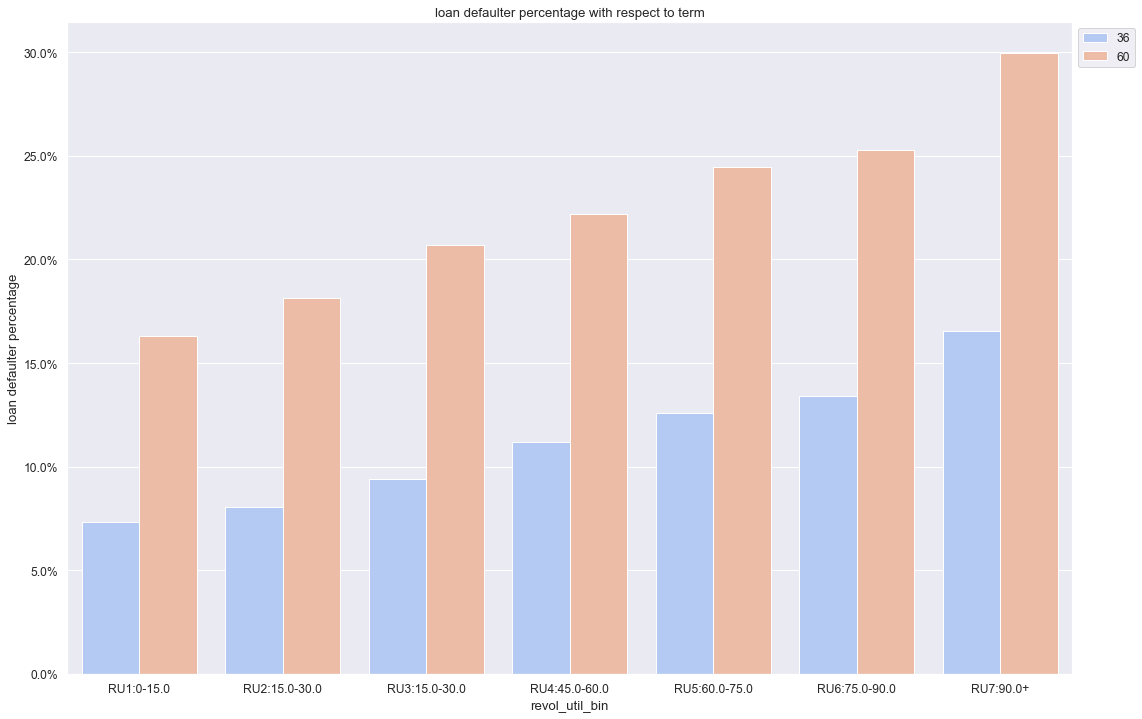

In [80]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'revol_util_bin',
           y = 'loan_status',
           hue = 'term',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['revol_util_bin'].unique()),
           hue_order=np.sort(loan_dataframe['term'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='revol_util_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   
 

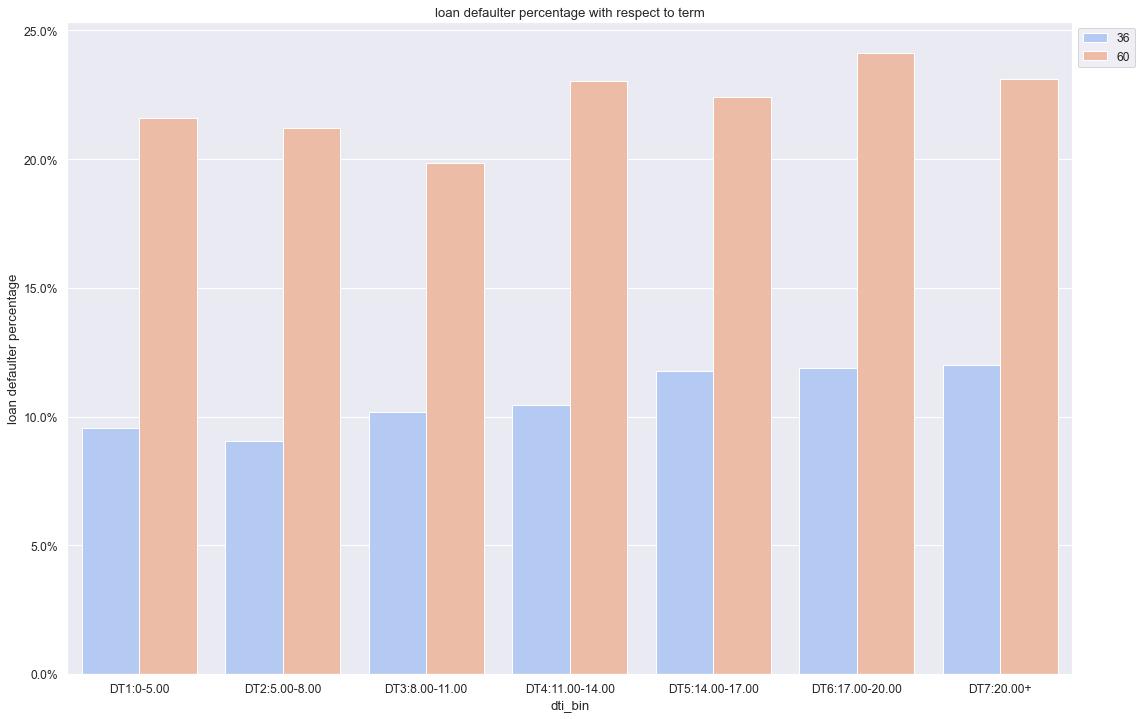

In [81]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'dti_bin',
           y = 'loan_status',
           hue = 'term',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['dti_bin'].unique()),
           hue_order=np.sort(loan_dataframe['term'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='dti_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


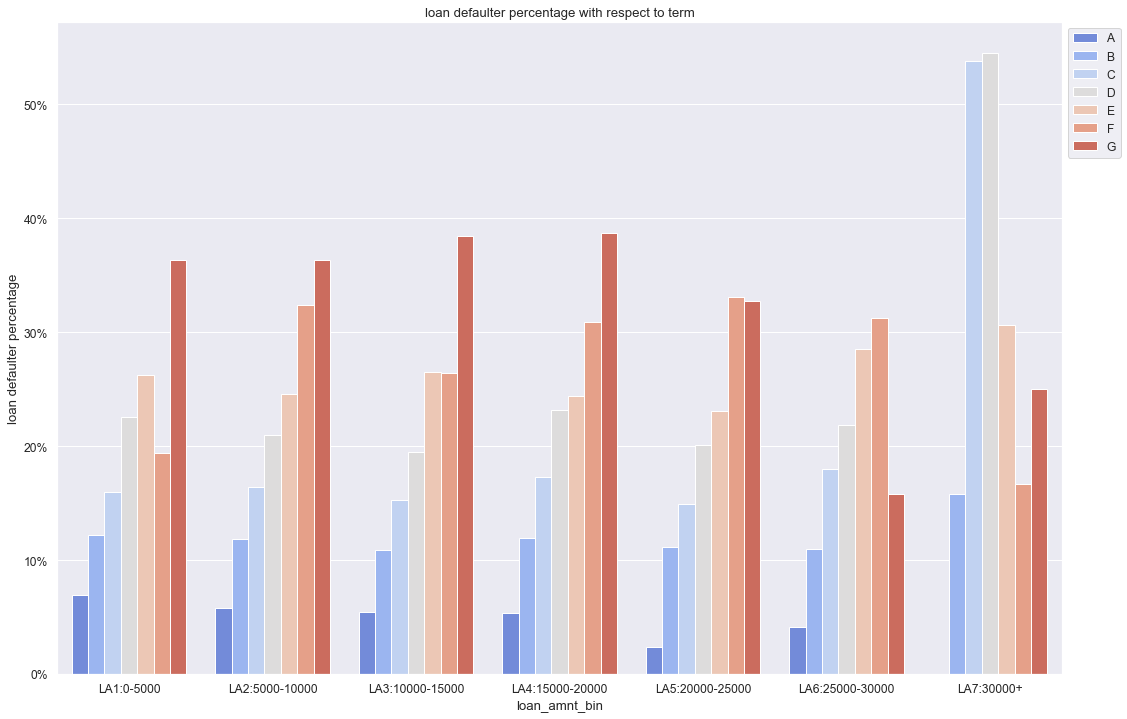

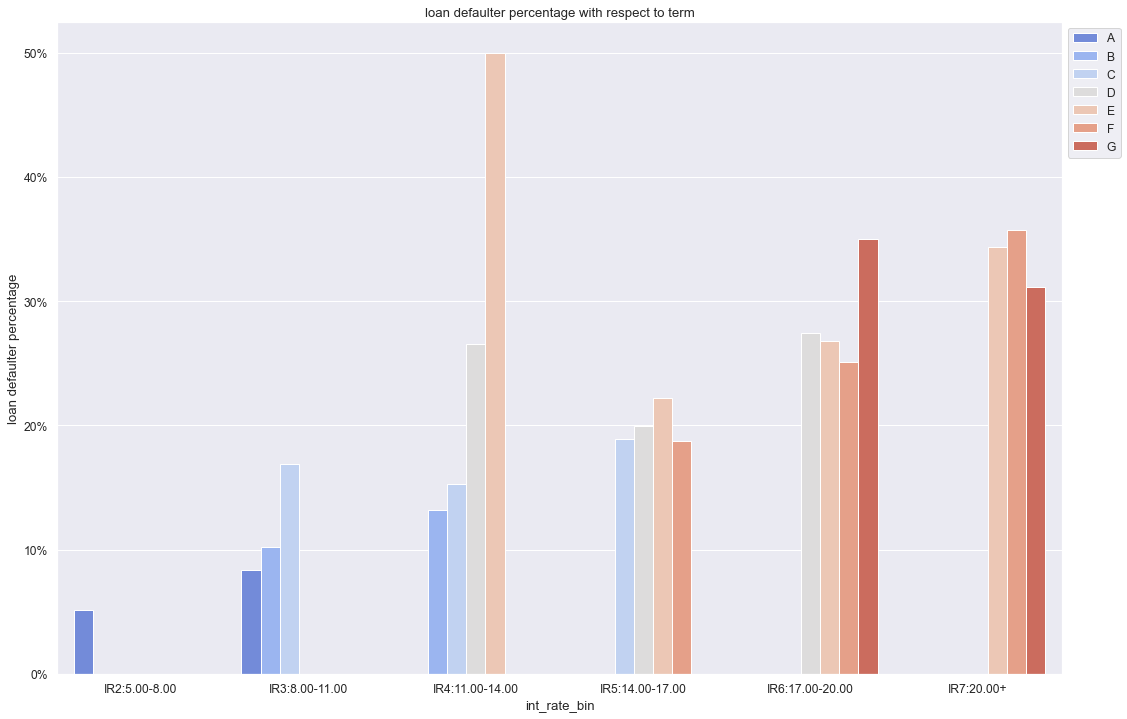

In [82]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           hue = 'grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique()),
           hue_order=np.sort(loan_dataframe['grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='loan_amnt_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   
# Categorical grade and int_rate_bin


plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'int_rate_bin',
           y = 'loan_status',
           hue = 'grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['int_rate_bin'].unique()),
           hue_order=np.sort(loan_dataframe['grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='int_rate_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


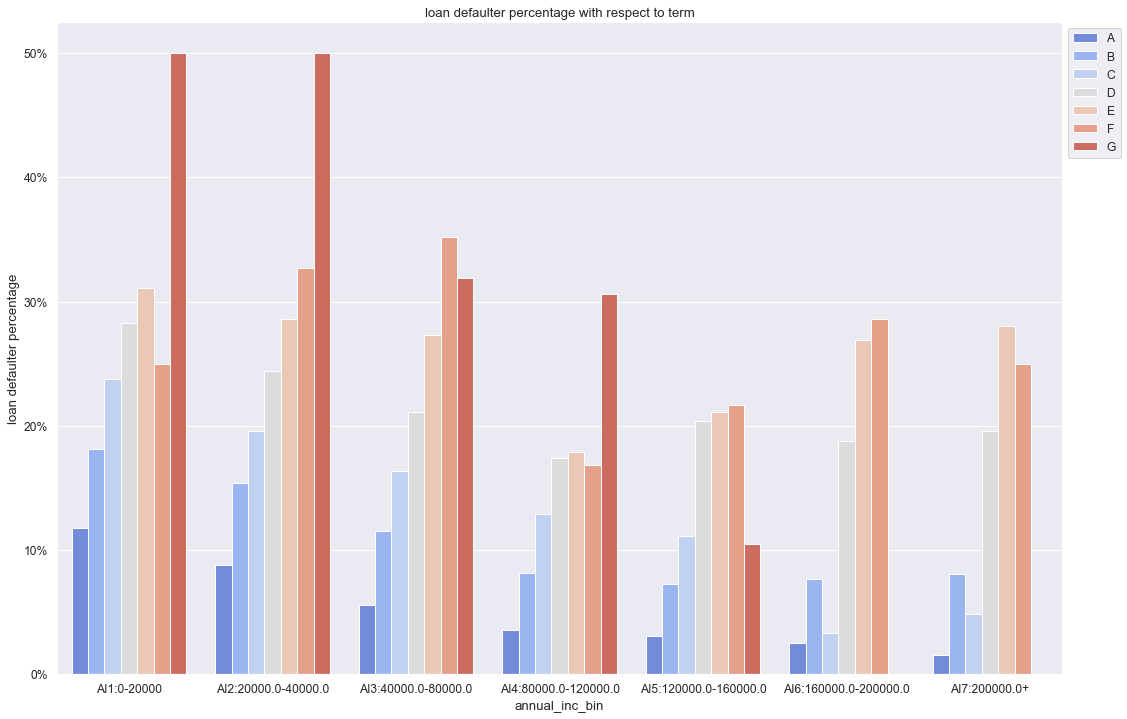

In [84]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'annual_inc_bin',
           y = 'loan_status',
           hue = 'grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['annual_inc_bin'].unique()),
           hue_order=np.sort(loan_dataframe['grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='annual_inc_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


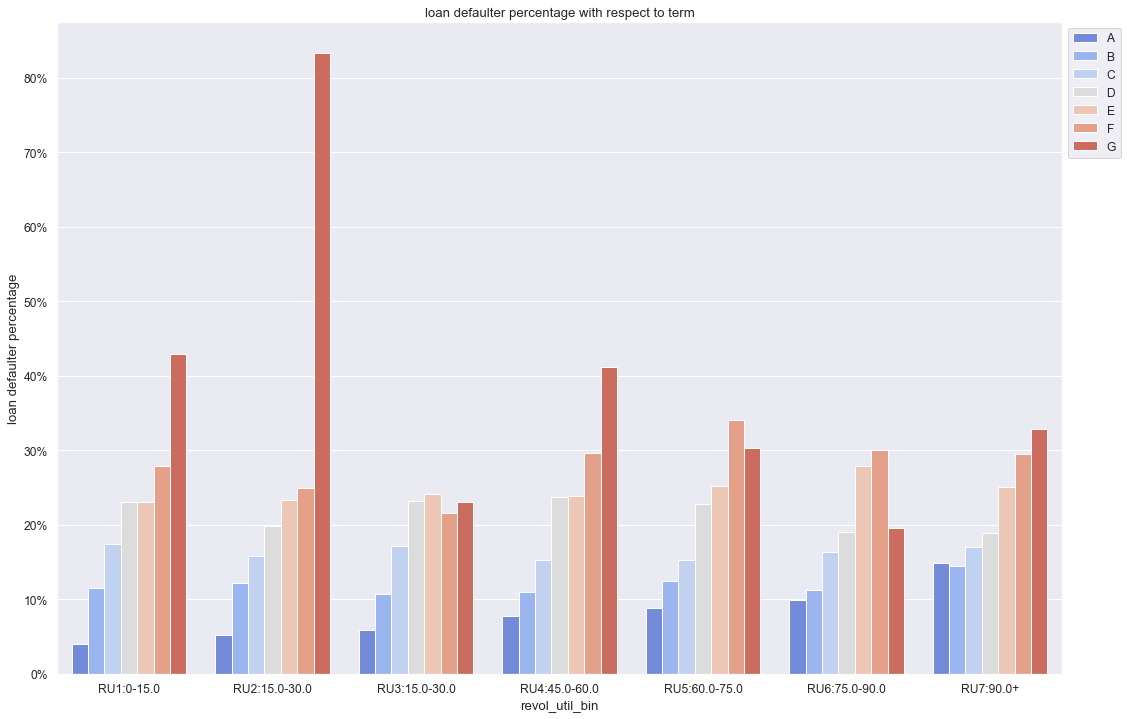

In [86]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'revol_util_bin',
           y = 'loan_status',
           hue = 'grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['revol_util_bin'].unique()),
           hue_order=np.sort(loan_dataframe['grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='revol_util_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show() 

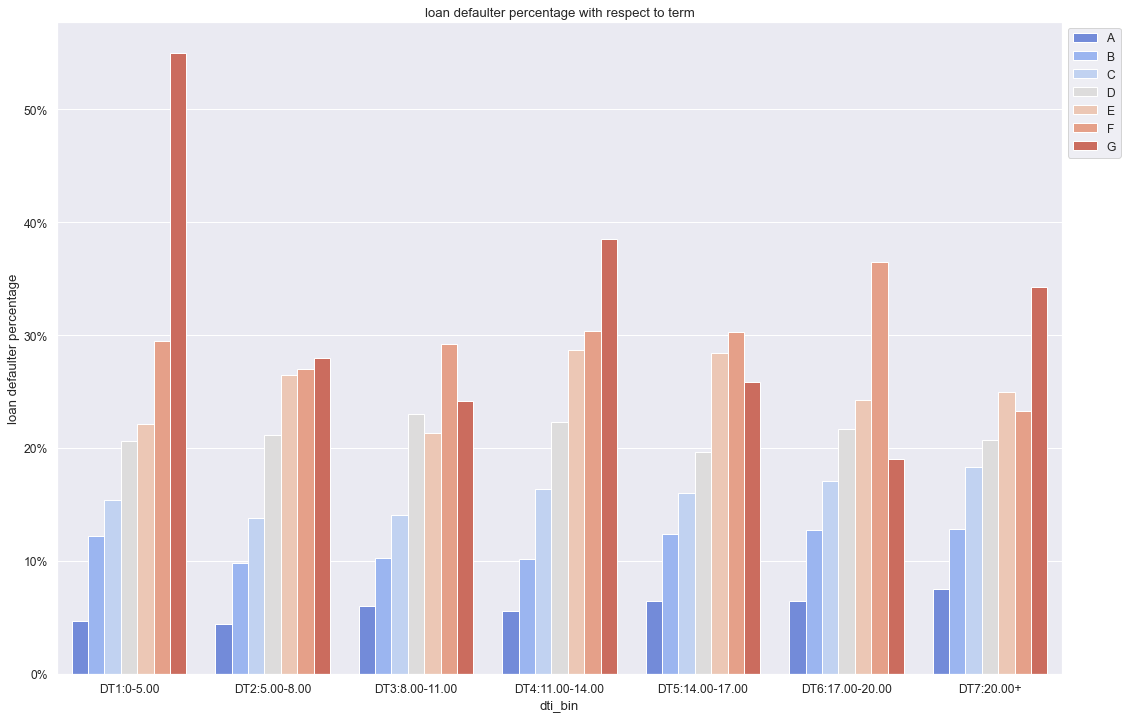

In [88]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'dti_bin',
           y = 'loan_status',
           hue = 'grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['dti_bin'].unique()),
           hue_order=np.sort(loan_dataframe['grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='dti_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

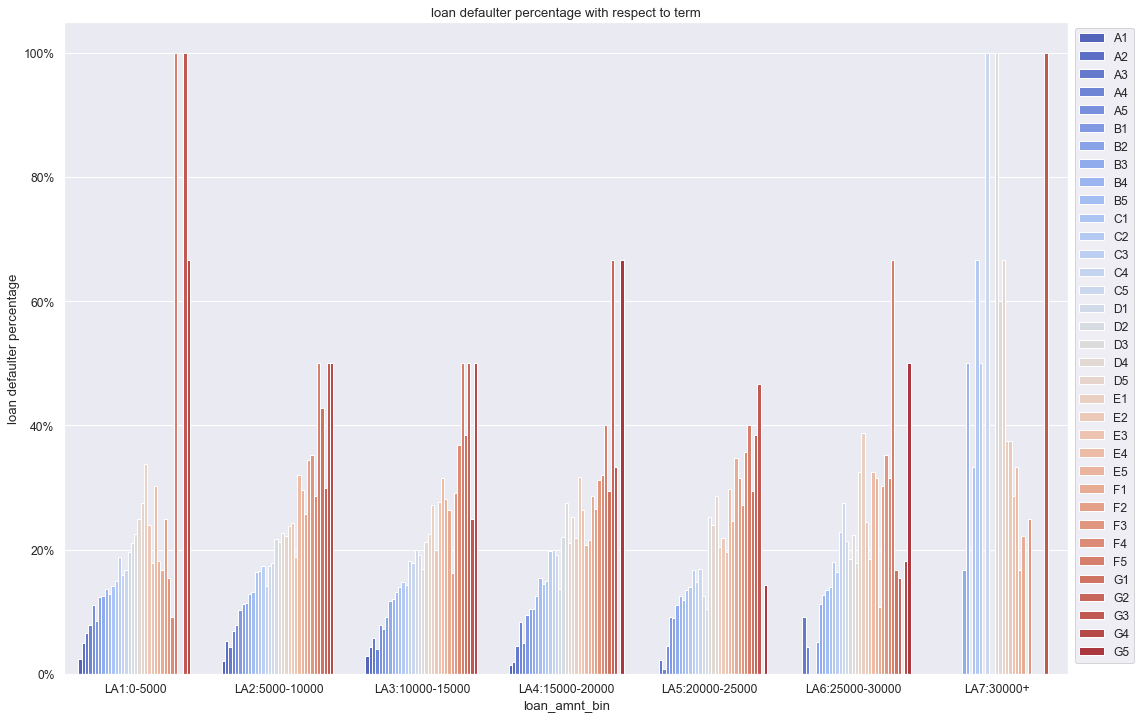

In [89]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           hue = 'sub_grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique()),
           hue_order=np.sort(loan_dataframe['sub_grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='loan_amnt_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

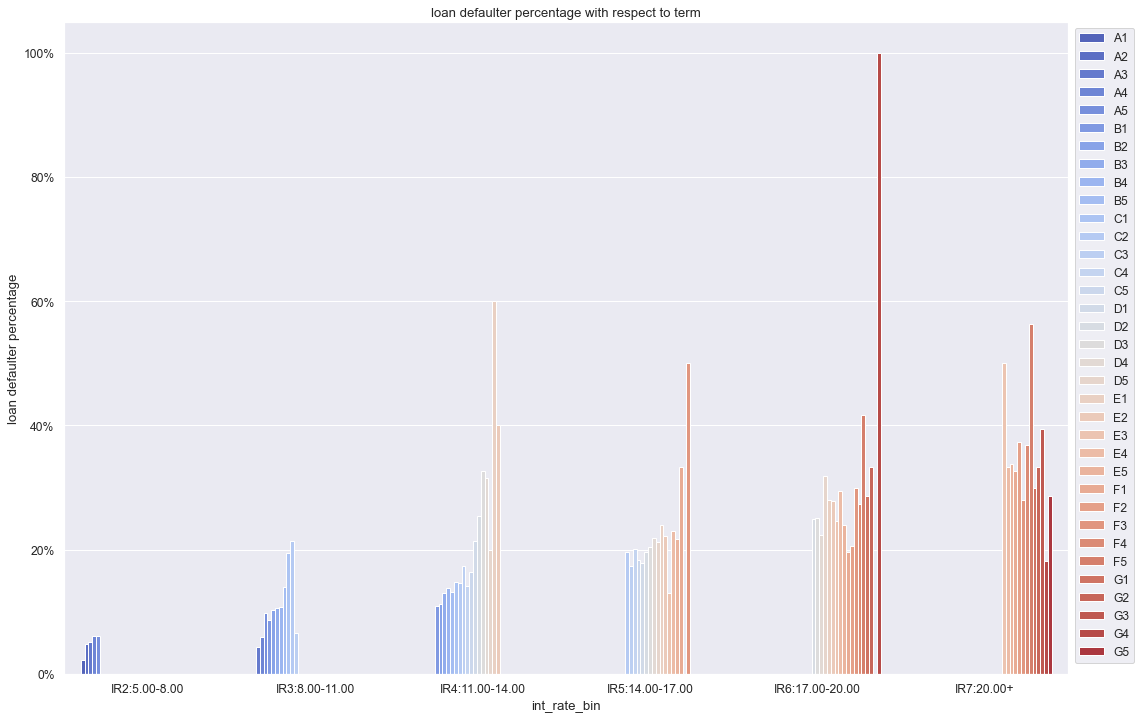

In [91]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'int_rate_bin',
           y = 'loan_status',
           hue = 'sub_grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['int_rate_bin'].unique()),
           hue_order=np.sort(loan_dataframe['sub_grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='int_rate_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

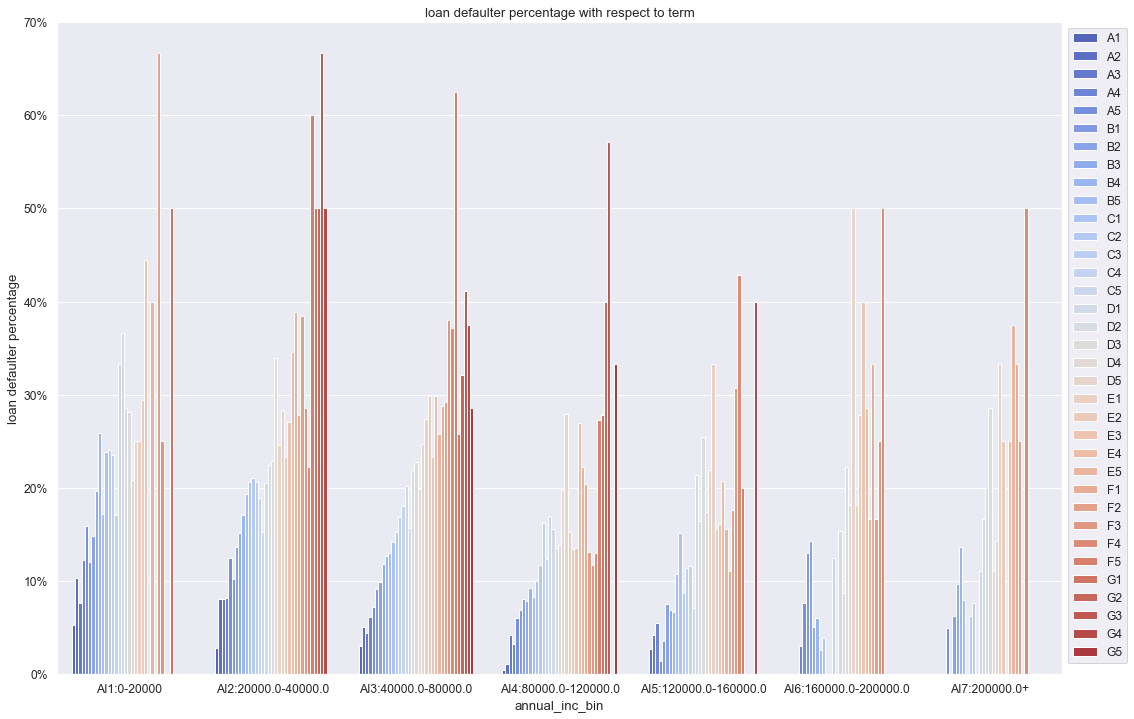

In [92]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'annual_inc_bin',
           y = 'loan_status',
           hue = 'sub_grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['annual_inc_bin'].unique()),
           hue_order=np.sort(loan_dataframe['sub_grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='annual_inc_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


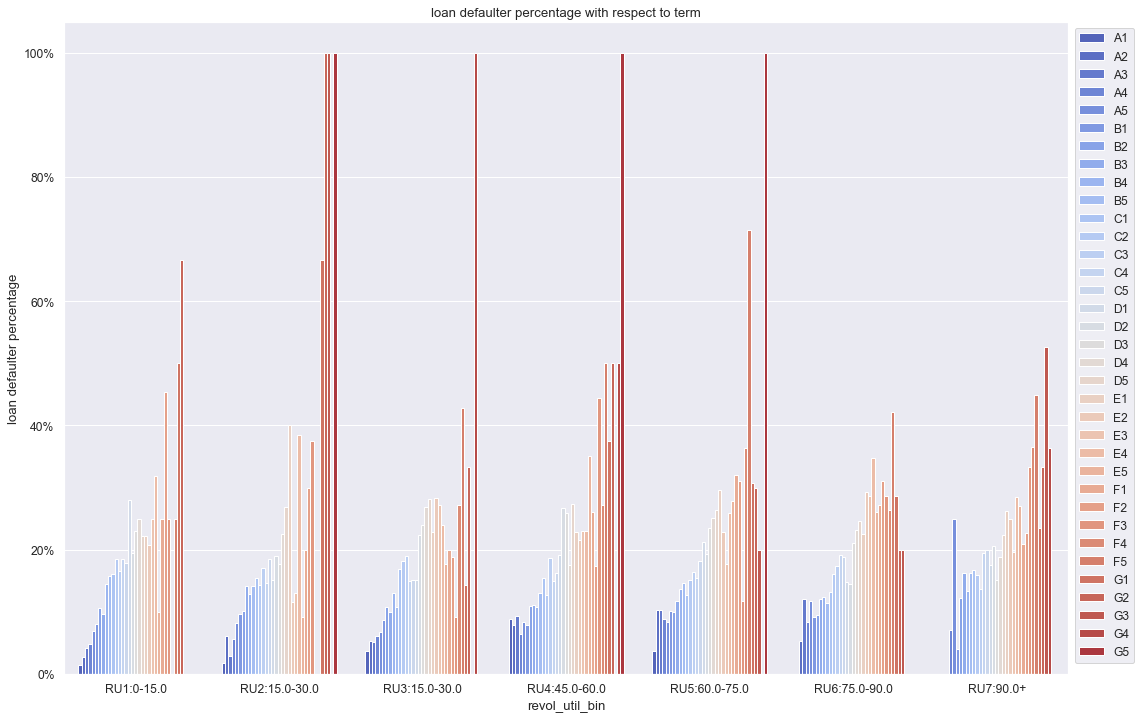

In [94]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'revol_util_bin',
           y = 'loan_status',
           hue = 'sub_grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['revol_util_bin'].unique()),
           hue_order=np.sort(loan_dataframe['sub_grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='revol_util_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   

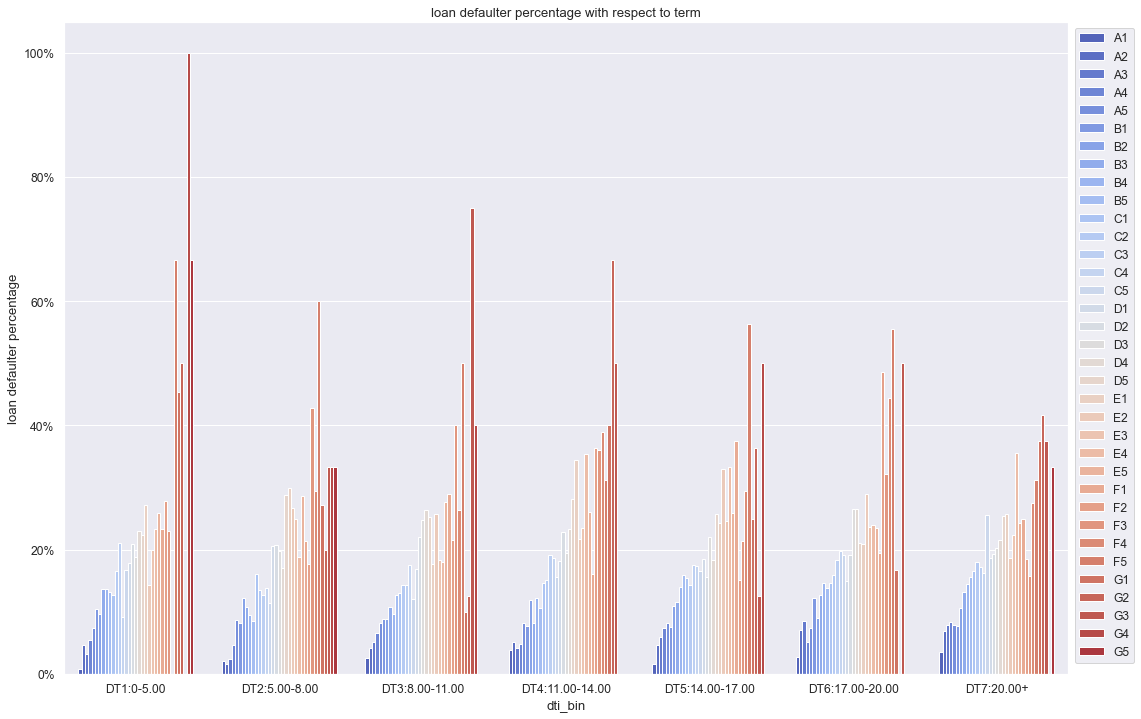

In [96]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'dti_bin',
           y = 'loan_status',
           hue = 'sub_grade',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['dti_bin'].unique()),
           hue_order=np.sort(loan_dataframe['sub_grade'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='dti_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

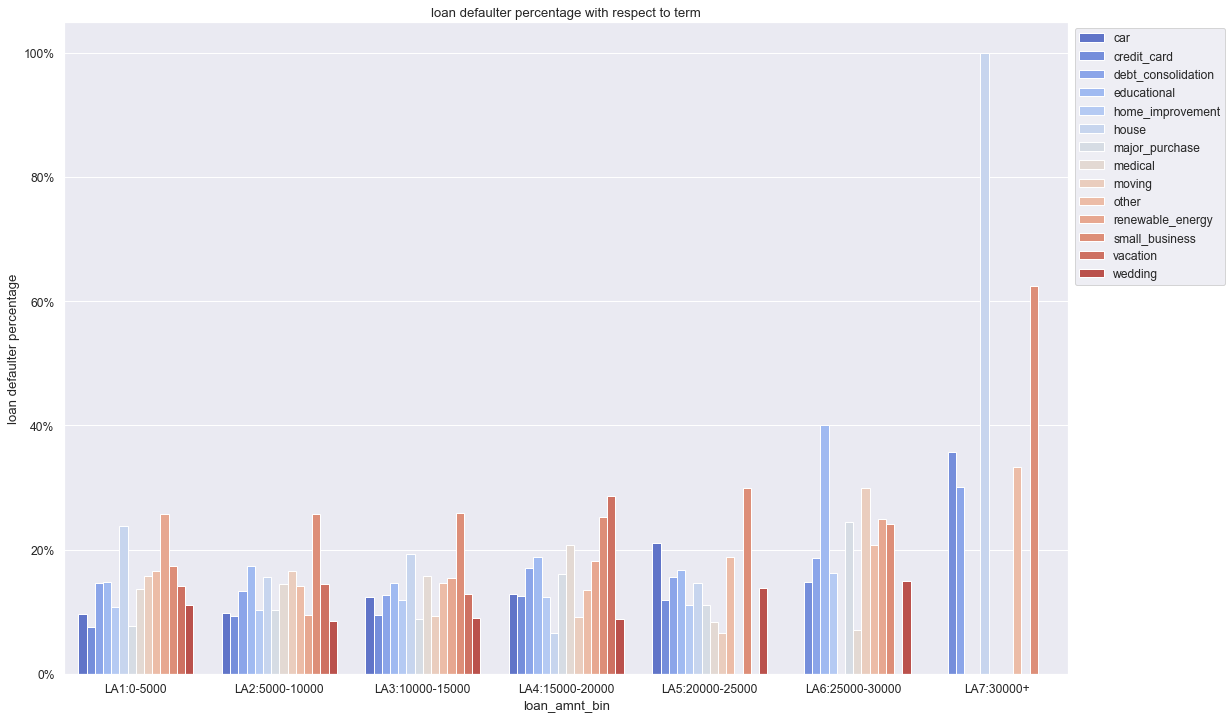

In [98]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           hue = 'purpose',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique()),
           hue_order=np.sort(loan_dataframe['purpose'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='loan_amnt_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

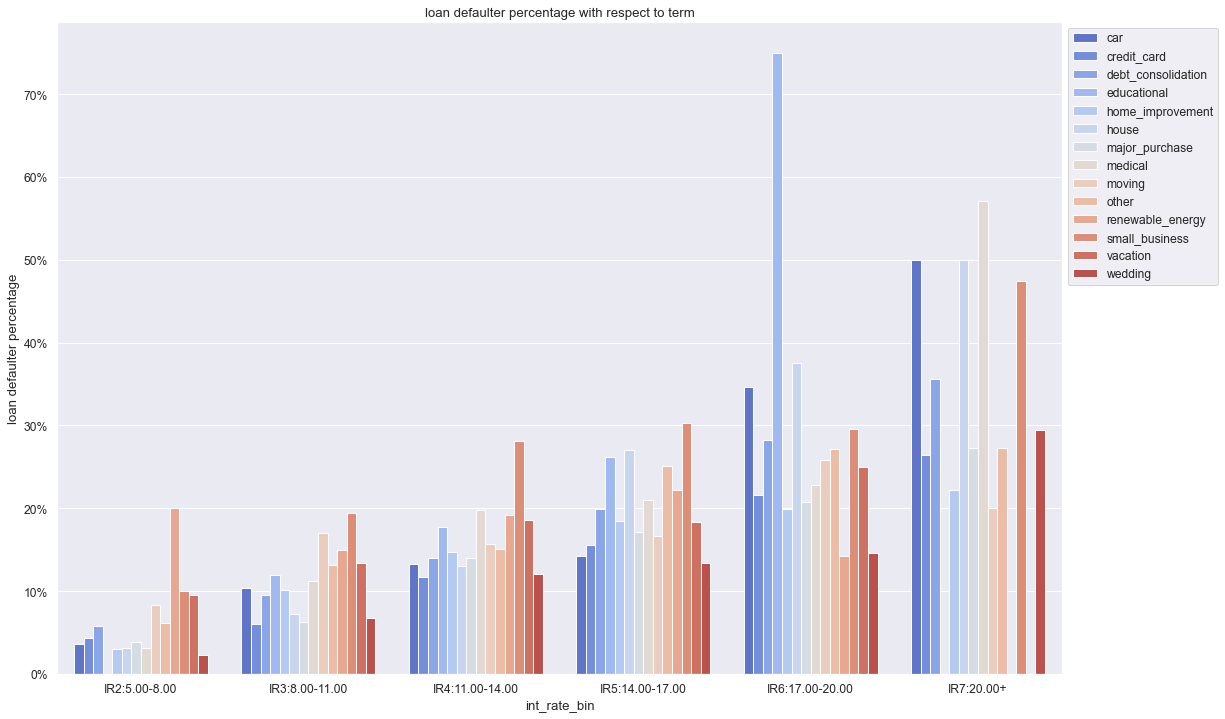

In [99]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'int_rate_bin',
           y = 'loan_status',
           hue = 'purpose',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['int_rate_bin'].unique()),
           hue_order=np.sort(loan_dataframe['purpose'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='int_rate_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

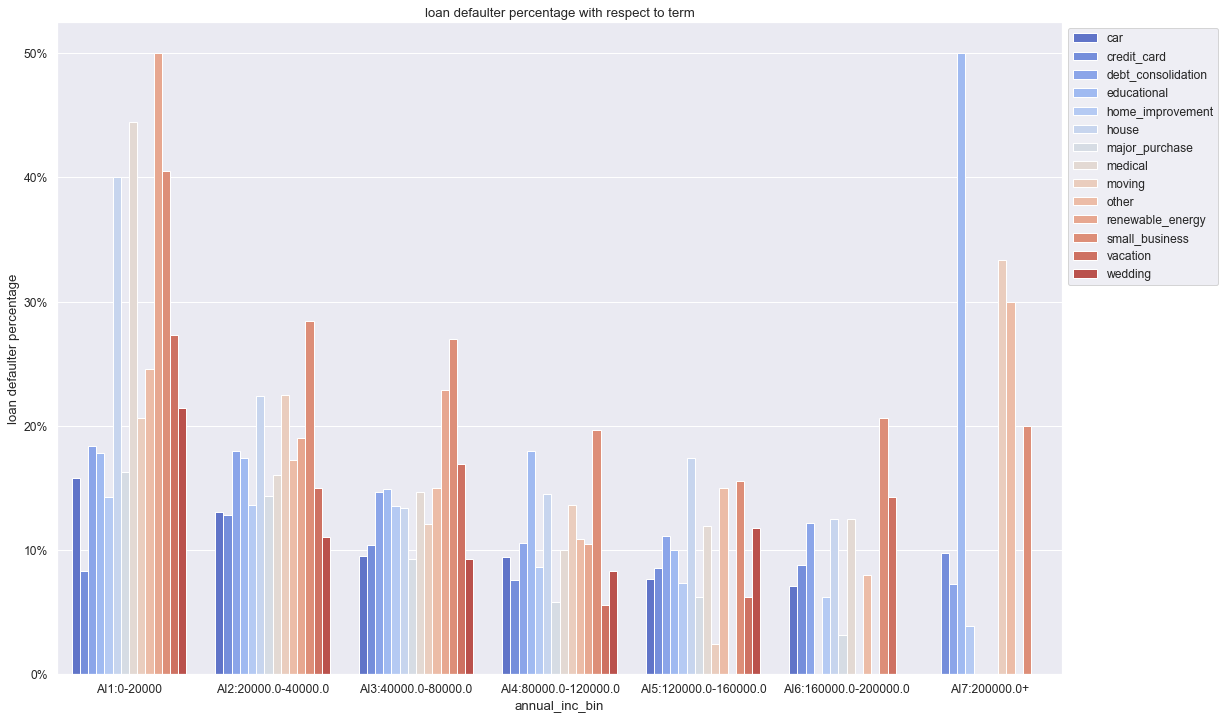

In [100]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'annual_inc_bin',
           y = 'loan_status',
           hue = 'purpose',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['annual_inc_bin'].unique()),
           hue_order=np.sort(loan_dataframe['purpose'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='annual_inc_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

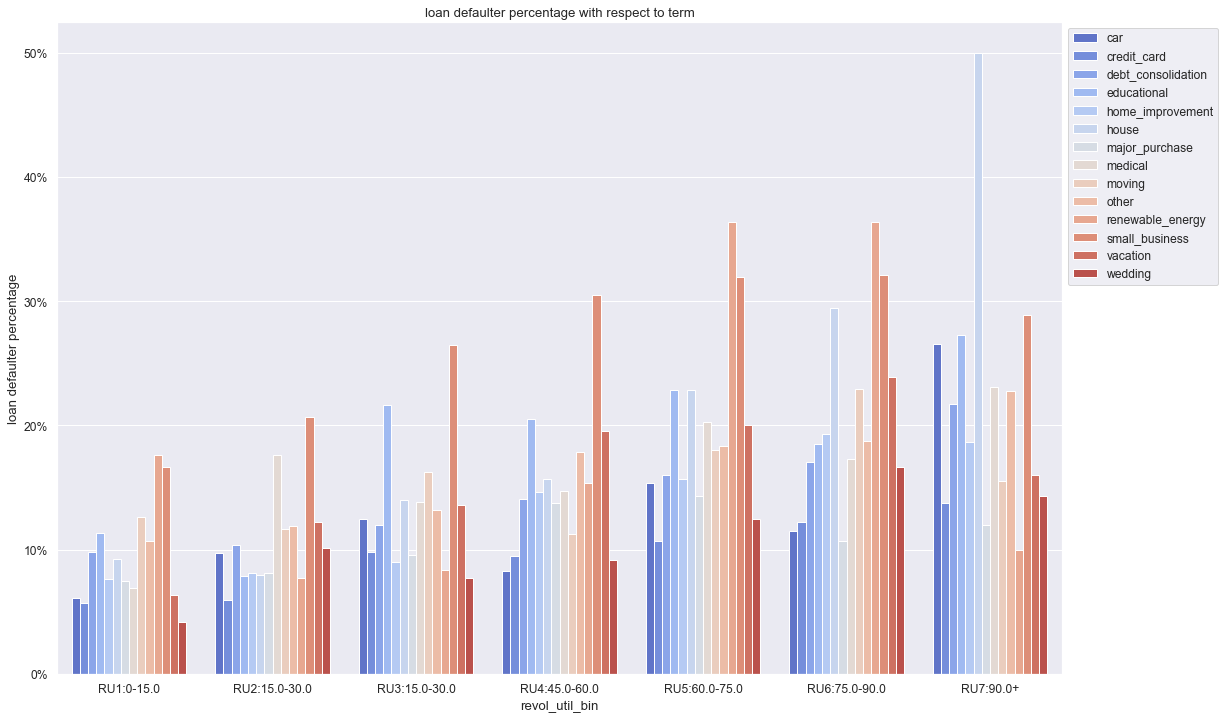

In [101]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'revol_util_bin',
           y = 'loan_status',
           hue = 'purpose',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['revol_util_bin'].unique()),
           hue_order=np.sort(loan_dataframe['purpose'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='revol_util_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show() 

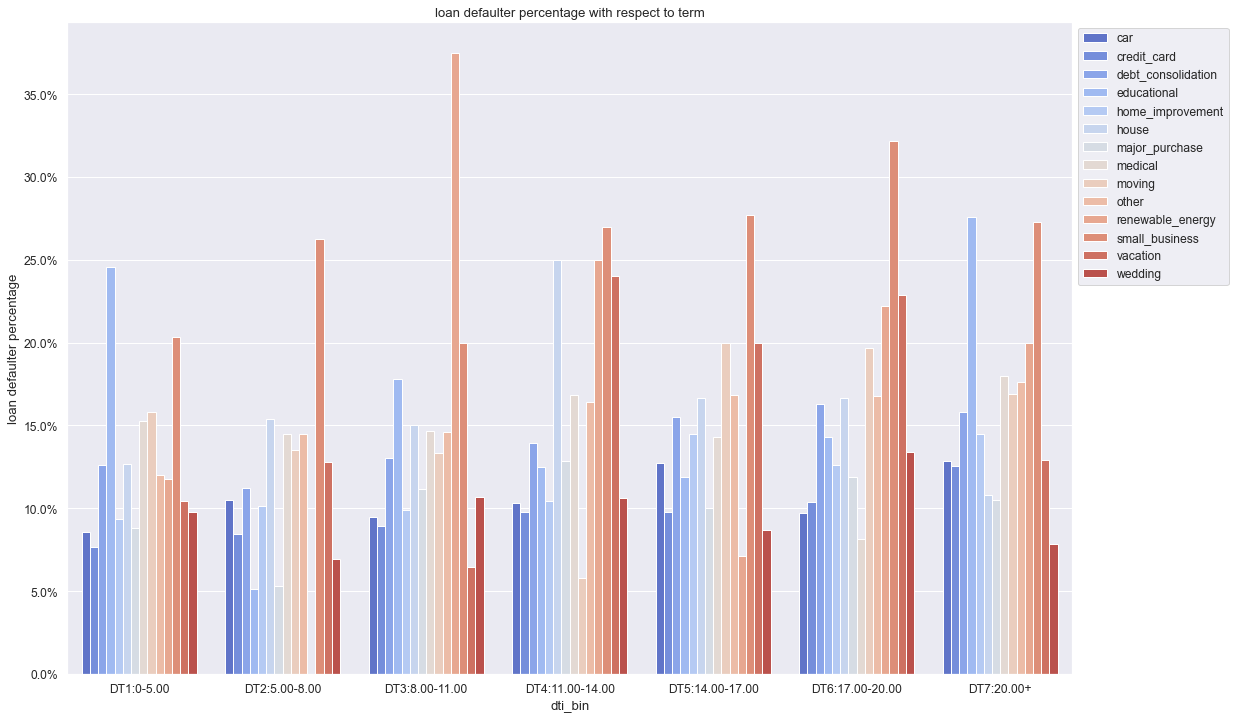

In [102]:
plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'dti_bin',
           y = 'loan_status',
           hue = 'purpose',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['dti_bin'].unique()),
           hue_order=np.sort(loan_dataframe['purpose'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='dti_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

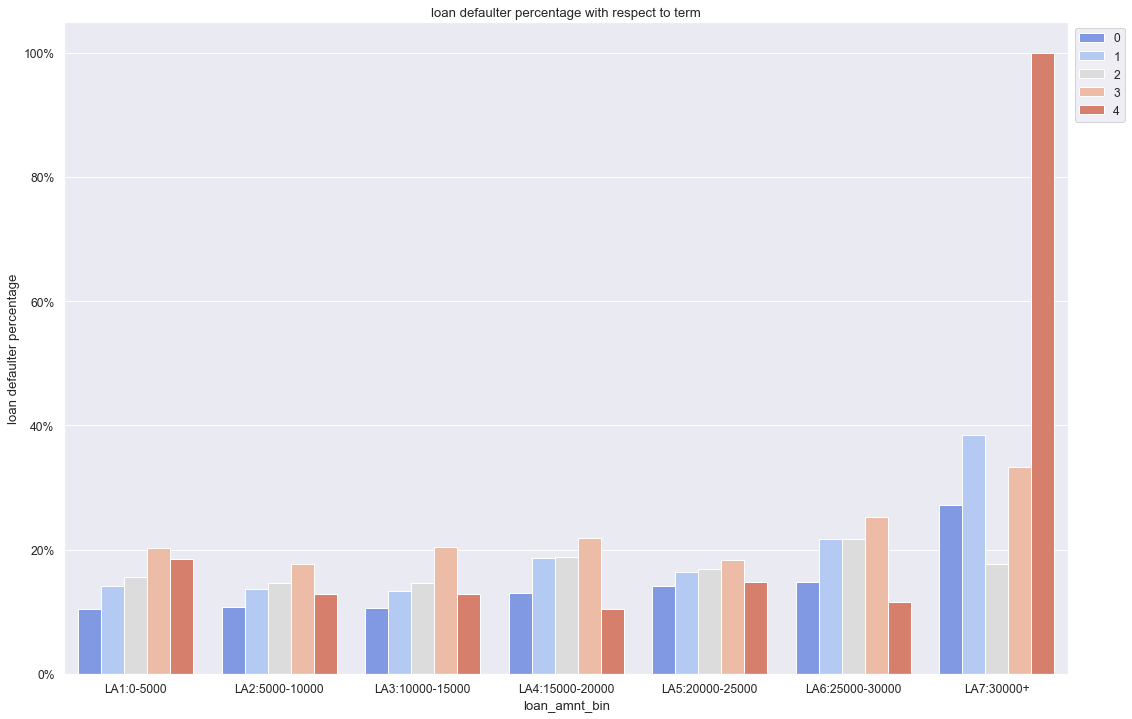

In [103]:
# Categorical inq_last_6mths and dti_bin


plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'loan_amnt_bin',
           y = 'loan_status',
           hue = 'inq_last_6mths',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['loan_amnt_bin'].unique()),
           hue_order=np.sort(loan_dataframe['inq_last_6mths'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='loan_amnt_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


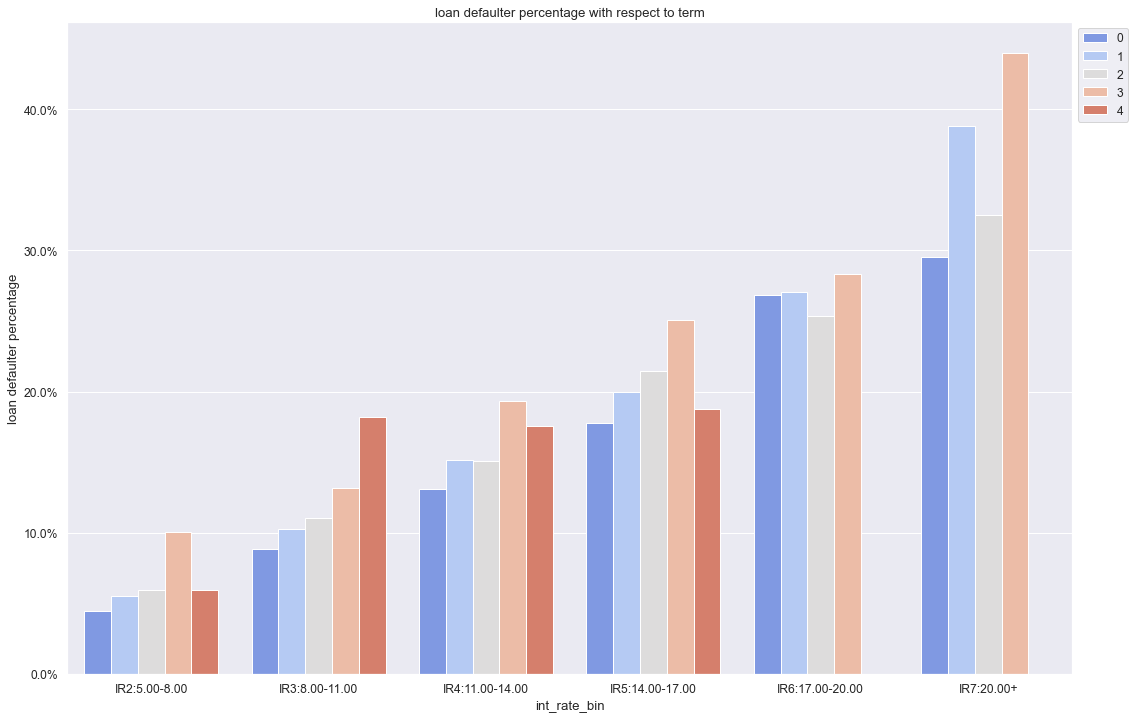

In [104]:
# Categorical inq_last_6mths and int_rate_bin


plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'int_rate_bin',
           y = 'loan_status',
           hue = 'inq_last_6mths',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['int_rate_bin'].unique()),
           hue_order=np.sort(loan_dataframe['inq_last_6mths'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='int_rate_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()   


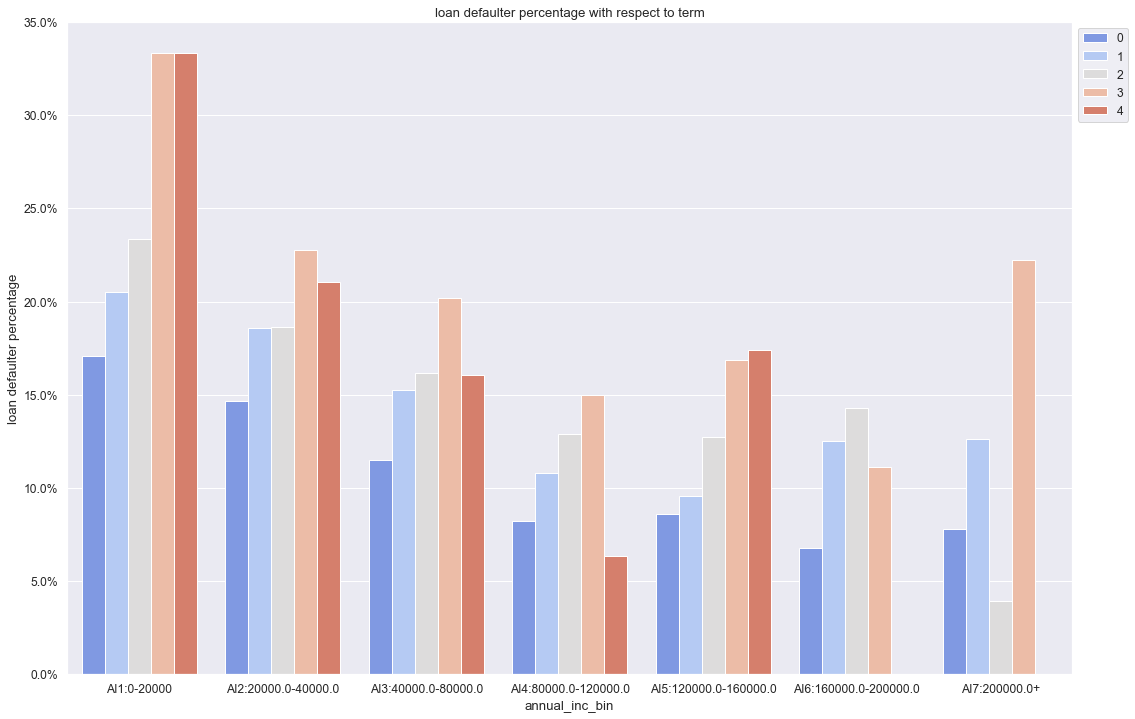

In [106]:
# Categorical inq_last_6mths and annual_inc_bin


plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'annual_inc_bin',
           y = 'loan_status',
           hue = 'inq_last_6mths',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['annual_inc_bin'].unique()),
           hue_order=np.sort(loan_dataframe['inq_last_6mths'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='annual_inc_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show() 

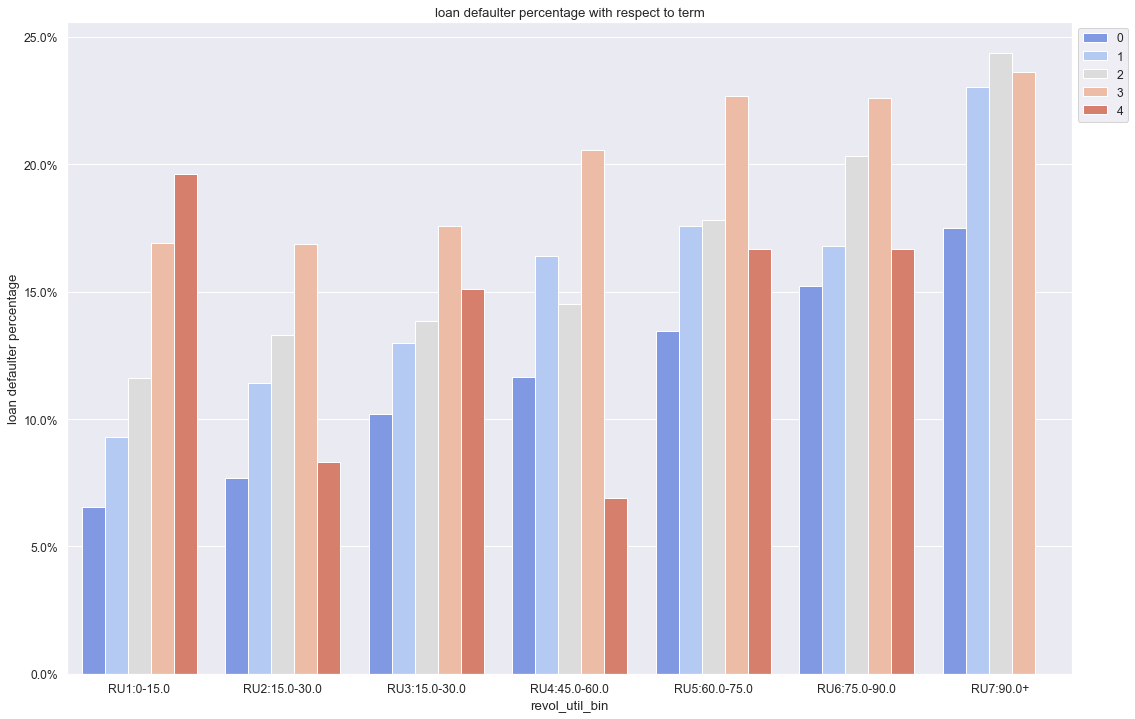

In [107]:
# Categorical inq_last_6mths and revol_util_bin


plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'revol_util_bin',
           y = 'loan_status',
           hue = 'inq_last_6mths',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['revol_util_bin'].unique()),
           hue_order=np.sort(loan_dataframe['inq_last_6mths'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='revol_util_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show() 

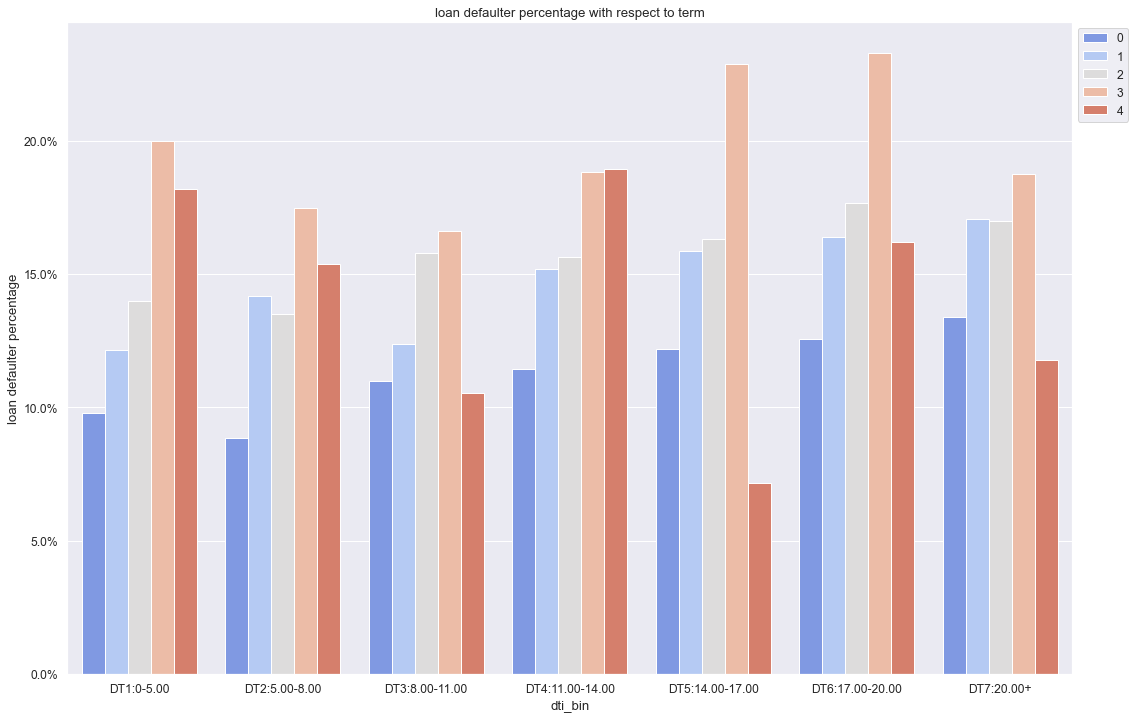

In [108]:
# Categorical inq_last_6mths and dti_bin


plt.figure(figsize=(18,12))

sns.set_style("darkgrid")

ax = sns.barplot(data = loan_dataframe,
           x = 'dti_bin',
           y = 'loan_status',
           hue = 'inq_last_6mths',    
           ci= None,
           palette = 'coolwarm',
           estimator=lambda x: sum(x==1)*100.0/len(x),
           order=np.sort(loan_dataframe['dti_bin'].unique()),
           hue_order=np.sort(loan_dataframe['inq_last_6mths'].unique())    
   )

# Font scale.
sns.set(font_scale=1.1)

plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Axes Labels.
ax.set(xlabel='dti_bin', ylabel='loan defaulter percentage')

# Chart Title.
ax.set_title("loan defaulter percentage with respect to term")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Show the plot.
plt.show()

<AxesSubplot:>

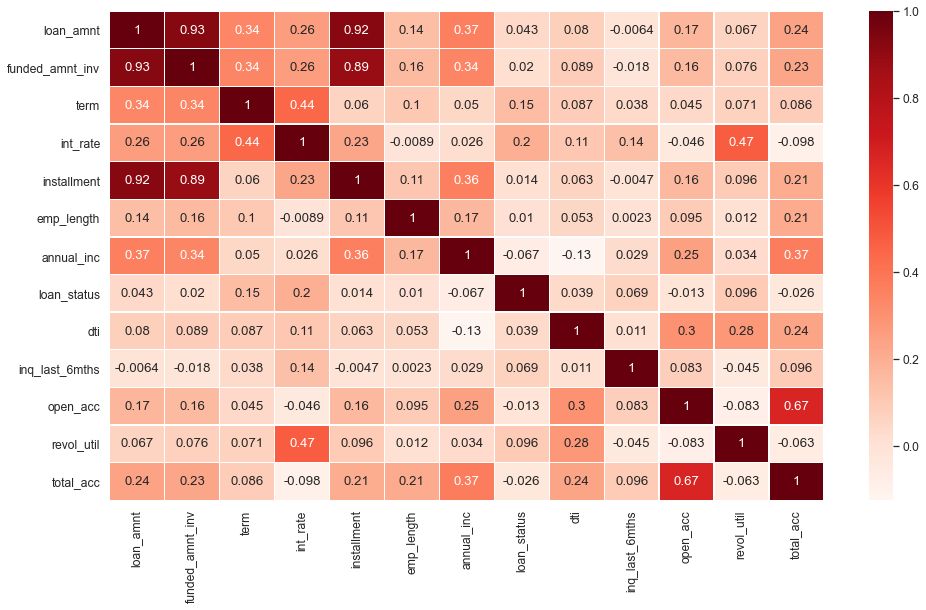

In [110]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(loan_dataframe.corr(method ='pearson'), cmap ='Reds', linewidths = 0.30, annot = True)